In [0]:
#Abstract-”Novel Corona virus, Pandemic, Covid-19, Lockdown” are the only buzzwords in the past year across the planet.  Within a few months this contagious corona virus spread from country to country universally and disintegrated almost every industry considered as pillar of world’s economy e.g.  healthcare, transportation, aerospace, agriculture, entertainment, education, manufacturing, hospitality and so on leaving a trail of crumbled humanity behind.  This research paper will mainly focus on dynamics of COVID-19 pandemic worldwide with time series analysis and its future predictions. There is a discussion on the trend analysis of the disease spread on the world map in addition to the visualizations of new cases, confirmed, recovered and death in the most affected countries with various graphs. The most important features of this exploration are established with segregating the world population into confirmed, death, recovered and new cases corresponding to different countries. Various machine learning regression models are developed and trained with the World Health Organization (WHO) and ArcGIS (Geographic Information System) steadfast data. The study will demonstrate a lifecycle of data science project prototype using Big data Analytics and architecture. Notable results are observed with truthful cumulative predictions country wise. Moreover, there are also discussions on comparison of the root mean squared values from different models in the conclusion part with regards to validation of machine learning model’s credibility and the future statistics of COVID-19 could be helping hand for government, NGOs, hospitals etc. for the battle against present pandemic.

In [0]:
#This study has observed use of Machine Learning models in 2 ways.
  #1. scikit learn libraries 
  #2. MLLib in pyspark
  
#Various phases of lifecycle of Data Science project prototype 
  #1. Requirement Gathering
  #2. Data Wrangling
  #3. Exploratory Data Analysis : Time series Analysis by pulling data directly from url
  #4. Machine learning model implementaion
  #5. Predictions
  #6. Data Visualization (involves in all the above phases)

In [0]:
#Machine Learning Algorithms 
  #Scikit learn : Linear MOdel 
    #1. OLS
    #2. Ridge
    #3. LASSO
    #4. LARS
    #5. BayesianRidge
    #6. ElasticNet
    #7. OrthogonalMatchingPursuit
    #8. TweedieRegressor
    #9. PassiveAggressiveRegressor
 #MLlib Pyspark : Regression and Classification Models
    #1. Linear 
    #2. K Mean clustering
    #3. Random Forest

In [0]:
# Initially we will try to install and import the python libraries required for data exploration and time series analyis. 
# In the later sections there is configuration done for SPARK for implementation of Machine Learning Models through MLLib pyspark and required libraries imported.


#Python Modules :
#Modules can be considered as code library. It is a file containing set of functions saved in a file with .py extension, that can be called in application, using "import ". When using a function from a module, it is called as per syntax,..

#Further, we can create an alias while importing a module, by using the 'as' keyword. Alias names make it faster to call the modules. We can also choose to import only parts from a module, by using the 'from' keyword.

#Below are the modules which have been frequently used in practical implementation.

#Pandas: Pandas is a Python library that makes handling tabular data easier. It introduces "Data Frames" and "Series" that allows to slice and dice rows and columns of information.

#NumPy Arrays: It is a python Library, for multi-dimensional array objects. It has functions for working with linear algebra and matrices It is easy to create a Pandas DataFrame from a NumPy array, and Pandas DataFrames can be cast as NumPy arrays.

#Matplotlib: It is library to plot the 2D/3D graphs for data visualization on pthon. Most of its utilities lies under the sub module Pyplot, alias as 'plt'.

#Scikit_Learn: It provides various supervised and unsupervised learning algorithms in python.

# MLlIb Pyspar: It also provides machine learning models in spark.

In [0]:
# IMPORTING PACKAGES & LIBRARY INSTALLATIONS

!python -m pip install --upgrade pip
!pip install plotly 
!pip install folium
!pip install sklearn
!pip install matplotlib==3.1.3
!pip3 install -U scikit-learn scipy matplotlib
!pip install fbprophet
!pip install pystan

# Basic packages

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt #visualization
import plotly #visualization
import plotly.express as px # plotly components
import plotly.graph_objects as go # plotly components
import requests # api requests
import datetime as dt # dealing with dates
import folium # world map visualization

# Machine Learning packages

from sklearn.preprocessing import normalize # data normalization
from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import LassoLars # LARS Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.linear_model import OrthogonalMatchingPursuit # OMR algorithm
from sklearn.linear_model import TweedieRegressor # Generalized linear algorithm
from sklearn.linear_model import PassiveAggressiveRegressor # Passive aggressive algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

# Deep Learning packages

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Collecting pip
 Downloading pip-21.0.1-py3-none-any.whl (1.5 MB)
▏ | 10 kB 17.1 MB/s eta 0:00:01 |▍ | 20 kB 21.1 MB/s eta 0:00:01 |▋ | 30 kB 15.2 MB/s eta 0:00:01 |▉ | 40 kB 10.4 MB/s eta 0:00:01 |█ | 51 kB 8.3 MB/s eta 0:00:01 |█▎ | 61 kB 6.2 MB/s eta 0:00:01 |█▌ | 71 kB 6.4 MB/s eta 0:00:01 |█▊ | 81 kB 6.9 MB/s eta 0:00:01 |██ | 92 kB 6.7 MB/s eta 0:00:01 |██▏ | 102 kB 7.0 MB/s eta 0:00:01 |██▍ | 112 kB 7.0 MB/s eta 0:00:01 |██▌ | 122 kB 7.0 MB/s eta 0:00:01 |██▊ | 133 kB 7.0 MB/s eta 0:00:01 |███ | 143 kB 7.0 MB/s eta 0:00:01 |███▏ | 153 kB 7.0 MB/s eta 0:00:01 |███▍ | 163 kB 7.0 MB/s eta 0:00:01 |███▋ | 174 kB 7.0 MB/s eta 0:00:01 |███▉ | 184 kB 7.0 MB/s eta 0:00:01 |████ | 194 kB 7.0 MB/s eta 0:00:01 |████▎ | 204 kB 7.0 MB/s eta 0:00:01 |████▌ | 215 kB 7.0 MB/s eta 0:00:01 |████▊ | 225 kB 7.0 MB/s eta 0:00:01 |█████ | 235 kB 7.0 MB/s eta 0:00:01 |█████ | 245 kB 7.0 MB/s eta 0:00:01 |█████▎ | 256 kB 7.0 MB/s eta 0:00:01 |█████▌ | 266 kB 7.0 MB/s eta 0:00:01 |█████▊ | 276 kB 7.0 MB/s eta 0:00:01 |██████ | 286 kB 7.0 MB/s eta 0:00:01 |██████▏ | 296 kB 7.0 MB/s eta 0:00:01 |██████▍ | 307 kB 7.0 MB/s eta 0:00:01 |██████▋ | 317 kB 7.0 MB/s eta 0:00:01 |██████▉ | 327 kB 7.0 MB/s eta 0:00:01 |███████ | 337 kB 7.0 MB/s eta 0:00:01 |███████▎ | 348 kB 7.0 MB/s eta 0:00:01 |███████▌ | 358 kB 7.0 MB/s eta 0:00:01 |███████▋ | 368 kB 7.0 MB/s eta 0:00:01 |███████▉ | 378 kB 7.0 MB/s eta 0:00:01 |████████ | 389 kB 7.0 MB/s eta 0:00:01 |████████▎ | 399 kB 7.0 MB/s eta 0:00:01 |████████▌ | 409 kB 7.0 MB/s eta 0:00:01 |████████▊ | 419 kB 7.0 MB/s eta 0:00:01 |█████████ | 430 kB 7.0 MB/s eta 0:00:01 |█████████▏ | 440 kB 7.0 MB/s eta 0:00:01 |█████████▍ | 450 kB 7.0 MB/s eta 0:00:01 |█████████▋ | 460 kB 7.0 MB/s eta 0:00:01 |█████████▉ | 471 kB 7.0 MB/s eta 0:00:01 |██████████ | 481 kB 7.0 MB/s eta 0:00:01 |██████████▏ | 491 kB 7.0 MB/s eta 0:00:01 |██████████▍ | 501 kB 7.0 MB/s eta 0:00:01 |██████████▋ | 512 kB 7.0 MB/s eta 0:00:01 |██████████▉ | 522 kB 7.0 MB/s eta 0:00:01 |███████████ | 532 kB 7.0 MB/s eta 0:00:01 |███████████▎ | 542 kB 7.0 MB/s eta 0:00:01 |███████████▌ | 552 kB 7.0 MB/s eta 0:00:01 |███████████▊ | 563 kB 7.0 MB/s eta 0:00:01 |████████████ | 573 kB 7.0 MB/s eta 0:00:01 |████████████▏ | 583 kB 7.0 MB/s eta 0:00:01 |████████████▍ | 593 kB 7.0 MB/s eta 0:00:01 |████████████▋ | 604 kB 7.0 MB/s eta 0:00:01 |████████████▊ | 614 kB 7.0 MB/s eta 0:00:01 |█████████████ | 624 kB 7.0 MB/s eta 0:00:01 |█████████████▏ | 634 kB 7.0 MB/s eta 0:00:01 |█████████████▍ | 645 kB 7.0 MB/s eta 0:00:01 |█████████████▋ | 655 kB 7.0 MB/s eta 0:00:01 |█████████████▉ | 665 kB 7.0 MB/s eta 0:00:01 |██████████████ | 675 kB 7.0 MB/s eta 0:00:01 |██████████████▎ | 686 kB 7.0 MB/s eta 0:00:01 |██████████████▌ | 696 kB 7.0 MB/s eta 0:00:01 |██████████████▊ | 706 kB 7.0 MB/s eta 0:00:01 |███████████████ | 716 kB 7.0 MB/s eta 0:00:01 |███████████████▏ | 727 kB 7.0 MB/s eta 0:00:01 |███████████████▎ | 737 kB 7.0 MB/s eta 0:00:01 |███████████████▌ | 747 kB 7.0 MB/s eta 0:00:01 |███████████████▊ | 757 kB 7.0 MB/s eta 0:00:01 |████████████████ | 768 kB 7.0 MB/s eta 0:00:01 |████████████████▏ | 778 kB 7.0 MB/s eta 0:00:01 |████████████████▍ | 788 kB 7.0 MB/s eta 0:00:01 |████████████████▋ | 798 kB 7.0 MB/s eta 0:00:01 |████████████████▉ | 808 kB 7.0 MB/s eta 0:00:01 |█████████████████ | 819 kB 7.0 MB/s eta 0:00:01 |█████████████████▎ | 829 kB 7.0 MB/s eta 0:00:01 |█████████████████▌ | 839 kB 7.0 MB/s eta 0:00:01 |█████████████████▊ | 849 kB 7.0 MB/s eta 0:00:01 |█████████████████▉ | 860 kB 7.0 MB/s eta 0:00:01 |██████████████████ | 870 kB 7.0 MB/s eta 0:00:01 |██████████████████▎ | 880 kB 7.0 MB/s eta 0:00:01 |██████████████████▌ | 890 kB 7.0 MB/s eta 0:00:01 |██████████████████▊ | 901 kB 7.0 MB/s eta 0:00:01 |███████████████████ | 911 kB 7.0 MB/s eta 0:00:01 |███████████████████▏ | 921 kB 7.0 MB/s eta 0:00:01 |███████████████████▍ | 931 kB 7.0 MB/s eta 0:00:01 |████████

In [0]:
# The json data file is pulled directly from ArcGIS url to get the latest information for visualization. 
# Main aim is to get the interactive graph plots displaying the results for the same day as the code executed.
# JSON file used in the analysis is in nested format with key column as “features”.
# This file contains aggregated data for 764 territories around the globe. There are other key columns available as well in the raw dataset when directly extracted from the url, such as “fields”, “geometryType”, “globalIdFieldName”,“uiqueIdField”. Most of the columns contains null values in this dataset which will be removed in the first instance of analytics process.

In [0]:
# DATA WRANGLING

# pulling raw data from api

def pull_covid_data(url):
    url_request = requests.get(url)
    url_json = url_request.json()
    df = pd.DataFrame(url_json['features'])
    return df

url = 'https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json'
raw_df = pull_covid_data(url)

# transforming raw data to clean data
# 'State' column is replaced with '' for all null values

def transform_RawData(df):
    df_list = df['attributes'].tolist()
    df = pd.DataFrame(df_list)
    df.set_index('OBJECTID')
    df = df[['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Recovered','Deaths','Active']]
    df.columns = ('State','Country','Last Update','Lat','Long','Confirmed','Recovered','Deaths','Active')
    df['State'].fillna(value = '', inplace = True)
    return df

data = transform_RawData(raw_df)

# data manipulation
# 'Last Update' date is formatted in 'YYYY-MM-DD HH:mm:ss' format.

def convert_time(data):
    time_data = int(data)
    converted_time = dt.datetime.fromtimestamp(time_data)
    return converted_time

data = data.dropna(subset = ['Last Update'])
data['Last Update'] = data['Last Update']/1000
data['Last Update'] = data['Last Update'].apply(convert_time)
data = pd.DataFrame(data)

data.head()

Out[4]:

State 
 Country 
 Last Update 
 Lat 
 Long 
 Confirmed 
 Recovered 
 Deaths 
 Active 
 
 
 
 
 0 
 
 Afghanistan 
 2021-03-07 16:25:59 
 33.93911 
 67.709953 
 55847 
 49378 
 2449 
 4020 
 
 
 1 
 
 Albania 
 2021-03-07 16:25:59 
 41.15330 
 20.168300 
 112078 
 74352 
 1918 
 35808 
 
 
 2 
 
 Algeria 
 2021-03-07 16:25:59 
 28.03390 
 1.659600 
 114104 
 78946 
 3010 
 32148 
 
 
 3 
 
 Andorra 
 2021-03-07 16:25:59 
 42.50630 
 1.521800 
 11019 
 10599 
 112 
 308 
 
 
 4 
 
 Angola 
 2021-03-07 16:25:59 
 -11.20270 
 17.873900 
 21055 
 19640 
 512 
 903

In [0]:
# EXPLORATORY DATA ANALYSIS & VISUALIZATION

# visualization of most affected countries

def plot_top10_countries(data):
    top10_confirmed = pd.DataFrame(data.groupby('Country')['Confirmed'].sum().nlargest(10).sort_values(ascending = False))
    fig1 = px.scatter(top10_confirmed, 
                      x = top10_confirmed.index, 
                      y = 'Confirmed', 
                      size = 'Confirmed', 
                      size_max = 120, 
                      color = top10_confirmed.index, 
                      title = 'TOP 10 CONFIRMED CASES COUNTRIES')
    fig1.show()
    
    top10_deaths = pd.DataFrame(data.groupby('Country')['Deaths'].sum().nlargest(10).sort_values(ascending = True))
    fig2 = px.bar(top10_deaths, 
                  x = 'Deaths', 
                  y = top10_deaths.index, 
                  height = 600, 
                  color = 'Deaths', 
                  orientation = 'h', 
                  color_continuous_scale = ['deepskyblue','red'], 
                  title = 'TOP 10 DEATH CASES COUNTRIES')
    fig2.show()
    
    top10_recovered = pd.DataFrame(data.groupby('Country')['Recovered'].sum().nlargest(10).sort_values(ascending = False))
    fig3 = px.bar(top10_recovered, 
                  x = top10_recovered.index, 
                  y = 'Recovered', 
                  height = 600, 
                  color = 'Recovered', 
                  title = 'TOP 10 RECOVERED CASES COUNTRIES', 
                  color_continuous_scale = px.colors.sequential.Viridis)
    fig3.show()
    
    top10_active = pd.DataFrame(data.groupby('Country')['Active'].sum().nlargest(10).sort_values(ascending = True))
    fig4 = px.bar(top10_active, 
                  x = 'Active', 
                  y = top10_active.index, 
                  height = 600, 
                  color = 'Active', orientation = 'h', 
                  color_continuous_scale = ['paleturquoise','blue'], 
                  title = 'TOP 10 ACTIVE CASES COUNTRIES')
    fig4.show()
    
plot_top10_countries(data)

# visualization of most affected countries with provinces

def top5_confirmed_provinces(country):
    provincial_data = data['Country'] == country
    provincial_data = data[provincial_data].nlargest(5, 'Confirmed')
    return provincial_data

topstates_us = top5_confirmed_provinces('US')
topstates_india = top5_confirmed_provinces('India')
topstates_brazil = top5_confirmed_provinces('Brazil')
topstates_uk = top5_confirmed_provinces('United Kingdom')

most_affected_states_us = go.Figure(data = [
    go.Bar(name = 'Active Cases', 
           x = topstates_us['State'], 
           y = topstates_us['Confirmed']),
    go.Bar(name = 'Confirmed Cases', 
           x = topstates_us['State'], 
           y = topstates_us['Active']),
    go.Bar(name = 'Death Cases', 
           x = topstates_us['State'], 
           y = topstates_us['Deaths'])
])

most_affected_states_us.update_layout(title = 'MOST AFFECTED STATES IN USA', 
                                      height = 600, 
                                      barmode = 'stack')
most_affected_states_us.show()

most_affected_states_india = go.Figure(data = [
    go.Bar(name = 'Active Cases', 
           x = topstates_india['State'], 
           y = topstates_india['Confirmed']),
    go.Bar(name = 'Confirmed Cases', 
           x = topstates_india['State'], 
           y = topstates_india['Active']),
    go.Bar(name = 'Recovered Cases', 
           x = topstates_india['State'], 
           y = topstates_india['Recovered']),
    go.Bar(name = 'Death Cases', 
           x = topstates_india['State'], 
           y = topstates_india['Deaths'])
])

most_affected_states_india.update_layout(title = 'MOST AFFECTED STATES IN INDIA', 
                                         height = 600,
                                         barmode = 'stack')
most_affected_states_india.show()

most_affected_states_brazil = go.Figure(data = [
    go.Bar(name = 'Active Cases', 
           x = topstates_brazil['State'], 
           y = topstates_brazil['Confirmed']),
    go.Bar(name = 'Confirmed Cases', 
           x = topstates_brazil['State'], 
           y = topstates_brazil['Active']),
    go.Bar(name = 'Recovered Cases', 
           x = topstates_brazil['State'], 
           y = topstates_brazil['Recovered']),
    go.Bar(name = 'Death Cases', 
           x = topstates_brazil['State'], 
           y = topstates_brazil['Deaths'])
])

most_affected_states_brazil.update_layout(title = 'MOST AFFECTED STATES IN BRAZIL', 
                                          height = 600,
                                          barmode = 'stack')
most_affected_states_brazil.show()

most_affected_states_uk = go.Figure(data = [
    go.Bar(name = 'Active Cases', 
           x = topstates_uk['State'], 
           y = topstates_uk['Confirmed']),
    go.Bar(name = 'Confirmed Cases', 
           x = topstates_uk['State'], 
           y = topstates_uk['Active']),
    go.Bar(name = 'Death Cases', 
           x = topstates_uk['State'], 
           y = topstates_uk['Deaths'])
])

most_affected_states_uk.update_layout(title = 'MOST AFFECTED STATES IN UNITED KINGDOM', 
                                      height = 600,
                                      barmode = 'stack')
most_affected_states_uk.show()



In [0]:
###############################################################################################################################################
# Time series Analysis and Visualization

# In this section, there will be more focused discussion on the time series analysis on up-to-the-minute WHO COVID data stored in databricks file system read as spark data frames in later sections. Here it is pulled directly from API for including today's data also for time series analysis.
# The dataframe contains features as ‘New_cases’, ‘Cumulative_cases’, ‘New_deaths’, and ‘Cumulative_ deaths’ that is aggregated by ‘Date_reported’.  And then by using the functionality of ‘Plotly Graph Objects’ cumulative news cases and death are scattered in 2-dimension. 


time_series = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
time_series_dates = time_series.groupby('Date_reported').sum()

def plot_TimeSeries():
    cumulative_cases = go.Figure()
    cumulative_cases.add_trace(go.Scatter
                        (
                            x = time_series_dates.index, 
                             y = time_series_dates['Cumulative_cases'], 
                             fill = 'tonexty',
                             line_color = 'blue'
                        ))
    
    cumulative_cases.update_layout(title = "CUMULATIVE CASES WORLDWIDE")
    cumulative_cases.show()
    
    cumulative_deaths = go.Figure()
    cumulative_deaths.add_trace(go.Scatter
                     (
                         x = time_series_dates.index, 
                         y = time_series_dates['Cumulative_deaths'], 
                         fill = 'tonexty',
                         line_color = 'red'
                     ))
    
    cumulative_deaths.update_layout(title = "CUMULATIVE DEATH CASES WORLDWIDE")
    cumulative_deaths.show()
    
    new_cases = go.Figure()
    new_cases.add_trace(go.Scatter
                        (
                            x = time_series_dates.index, 
                            y = time_series_dates['New_cases'], 
                            fill = 'tonexty',
                            line_color = 'gold'
                        ))
    
    new_cases.update_layout(title = 'DAILY NEW CASES WORLDWIDE')
    new_cases.show()
    
    new_deaths = go.Figure()
    new_deaths.add_trace(go.Scatter
                         (
                             x = time_series_dates.index, 
                             y = time_series_dates['New_deaths'], 
                             fill = 'tonexty',
                             line_color = 'hotpink'
                         ))
    
    new_deaths.update_layout(title = 'DAILY DEATH CASES WORLDWIDE')
    new_deaths.show()
    
plot_TimeSeries()

def get_TimeSeries_data(country):
    time_series_data = time_series['Country'] == (country)
    time_series_data = time_series[time_series_data]
    return time_series_data

time_series_us = get_TimeSeries_data('United States of America')
time_series_india = get_TimeSeries_data('India')
time_series_brazil = get_TimeSeries_data('Brazil')
time_series_uk = get_TimeSeries_data('The United Kingdom')
time_series_russia = get_TimeSeries_data('Russian Federation')

def most_affected_TimeSeries():
    cumulative_cases = go.Figure()

    cumulative_cases.add_trace(go.Line
                               (
                                   x = time_series_us['Date_reported'], 
                                   y = time_series_us['Cumulative_cases'], 
                                   name = 'USA'
                               ))
    
    cumulative_cases.add_trace(go.Line
                               (
                                   x = time_series_india['Date_reported'], 
                                   y = time_series_india['Cumulative_cases'], 
                                   name = 'India'
                               ))
    
    cumulative_cases.add_trace(go.Line
                               (
                                   x = time_series_brazil['Date_reported'], 
                                   y = time_series_brazil['Cumulative_cases'], 
                                   name = 'Brazil'
                               ))
    
    cumulative_cases.add_trace(go.Line
                               (
                                   x = time_series_uk['Date_reported'], 
                                   y = time_series_uk['Cumulative_cases'], 
                                   name = 'United Kingdom'
                               ))
    
    cumulative_cases.add_trace(go.Line
                               (x = time_series_russia['Date_reported'], 
                                y = time_series_russia['Cumulative_cases'], 
                                name = 'Russia'
                               ))

    cumulative_cases.update_layout(title = "TIME SERIES OF MOST AFFECTED COUNTRIES' CUMULATIVE CASES")
    cumulative_cases.show()
    
    cumulative_deaths = go.Figure()

    cumulative_deaths.add_trace(go.Line
                                (
                                    x = time_series_us['Date_reported'], 
                                    y = time_series_us['Cumulative_deaths'], 
                                    name = 'USA'
                                ))
    
    cumulative_deaths.add_trace(go.Line
                                (
                                    x = time_series_india['Date_reported'], 
                                    y = time_series_india['Cumulative_deaths'], 
                                    name = 'India'
                                ))
    
    cumulative_deaths.add_trace(go.Line
                                (
                                    x = time_series_brazil['Date_reported'], 
                                    y = time_series_brazil['Cumulative_deaths'], 
                                    name = 'Brazil'
                                ))
    
    cumulative_deaths.add_trace(go.Line
                                (
                                    x = time_series_uk['Date_reported'], 
                                    y = time_series_uk['Cumulative_deaths'], 
                                    name = 'United Kingdom'
                                ))
    
    cumulative_deaths.add_trace(go.Line
                                (
                                    x = time_series_russia['Date_reported'], 
                                    y = time_series_russia['Cumulative_deaths'], 
                                    name = 'Russia'
                                ))

    cumulative_deaths.update_layout(title = "TIME SERIES OF MOST AFFECTED COUNTRIES' CUMULATIVE DEATH CASES")
    cumulative_deaths.show()
    
    new_cases = go.Figure()

    new_cases.add_trace(go.Line
                        (
                            x = time_series_us['Date_reported'], 
                            y = time_series_us['New_cases'], 
                            name = 'USA'
                        ))
    
    new_cases.add_trace(go.Line
                        (
                            x = time_series_india['Date_reported'], 
                            y = time_series_india['New_cases'], 
                            name = 'India'
                        ))
    
    new_cases.add_trace(go.Line
                        (
                            x = time_series_brazil['Date_reported'], 
                            y = time_series_brazil['New_cases'], 
                            name = 'Brazil'
                        ))
    
    new_cases.add_trace(go.Line
                        (
                            x = time_series_uk['Date_reported'], 
                            y = time_series_uk['New_cases'], 
                            name = 'United Kingdom'
                        ))
    
    new_cases.add_trace(go.Line
                        (
                            x = time_series_russia['Date_reported'], 
                            y = time_series_russia['New_cases'], 
                            name = 'Russia'
                        ))

    new_cases.update_layout(title = "TIME SERIES OF MOST AFFECTED COUNTRIES' DAILY NEW CASES")
    new_cases.show()
    
    new_deaths = go.Figure()

    new_deaths.add_trace(go.Line
                         (
                             x = time_series_us['Date_reported'], 
                             y = time_series_us['New_deaths'], 
                             name = 'USA'
                         ))
    
    new_deaths.add_trace(go.Line
                         (x = time_series_india['Date_reported'], 
                          y = time_series_india['New_deaths'], 
                          name = 'India'
                         ))
    
    new_deaths.add_trace(go.Line
                         (
                             x = time_series_brazil['Date_reported'], 
                             y = time_series_brazil['New_deaths'], 
                             name = 'Brazil'
                         ))
    
    new_deaths.add_trace(go.Line
                         (
                             x = time_series_uk['Date_reported'], 
                             y = time_series_uk['New_deaths'], 
                             name = 'United Kingdom'
                         ))
    
    new_deaths.add_trace(go.Line
                         (
                             x = time_series_russia['Date_reported'], 
                             y = time_series_russia['New_deaths'], 
                             name = 'Russia'))

    new_deaths.update_layout(title = "TIME SERIES OF MOST AFFECTED COUNTRIES' DAILY DEATH CASES")
    new_deaths.show()
    
most_affected_TimeSeries()


In [0]:
###########################################################################################################################################
# world map visualization

# Lastly, as one of the goal of this study was, visualizing the COVID-19 spread in the world map. Here all the corona virus affected countries are highlighted in 2-dimensional world map. This has been achieved by using \textit{‘folium'} library in python. The countries in the world map, encircled in red, can be visualized effectively by zooming in/out option in the graph created during the research practical.


def create_world_map():
    map_data = data.groupby('Country').sum()
    world_map = folium.Map(tiles = 'cartodbpositron', zoom_start = 2, max_zoom = 6, min_zoom = 2)
    
    for i in range(len(map_data)):
        folium.Circle(location = [map_data.iloc[i]['Lat'], map_data.iloc[i]['Long']],
                      fill = True,
                      radius = ((np.log(map_data.iloc[i, -1] * 1.0001)) + 0.2) * 40000,
                      fill_color = 'blue',
                      color = 'red').add_to(world_map)
    
    return world_map

create_world_map()

/local_disk0/tmp/1615135562469-0/PythonShell.py:14: RuntimeWarning:

invalid value encountered in log

/local_disk0/tmp/1615135562469-0/PythonShell.py:14: RuntimeWarning:

divide by zero encountered in log

Out[10]:

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_f7b2bd90e80a433191b6e152966f5145%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_f7b2bd90e80a433191b6e152966f5145%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_f7b2bd90e80a433191b6e152966f5145%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_f7b2bd90e80a433191b6e152966f5145%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B0%2C%200%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%201%2C%0A%20%20%20%20%20%20%20%20%20%20%2

In [0]:
#Linear regression: It is a method to plot a line against dataset of observations and further this graph can be extended to observe predicted or unobserved values. It uses the concept of least squares to minimize the squared error between each point and line. Linear regression is defined with the help of slope-intercept equation of a line (Y= mX+c)
#R-squared measures, also known as coefficients of determination, will be used to determined the efficiecy of the regression models.Mathematically, r-squared is calculated as : 1.0 - (sum of squared errors/sum of squared variation from mean). Here, python will help us to get the r-squared values directly using regresion modules.

#The range of r-squared values is from 0 to 1, where 1 shows all the variance is capture and 0 shows none of the variance is captured.

#Polynomial regression: It gives an answer to the non- linear relationships, where the power of x is not equal to 1, e.g. y = mx^2 + nx + c (2nd degree of polynomial). A high r-squared value signifies a well fit curve to the training data. As the number of degree increases,so the curve comlexity.
#We are tring to get a relationship between covid new_cases and new_deaths.

In [0]:
# Ordinary least-squares is another name for the linear regression model. It follows the equation of a line, y = mx + b where y is the dependent variable and x is the independent variable. Here, the relation between new cases and corresponding impact on new deaths will be observed. However, there are multiple regularization techniques used with regression models.
# Discussion more about regularization, ridge regression is applied when the data suffers from multi collinearity (independent variables are highly correlated). In multicollinearity, even though the least squares estimates (OLS) are unbiased, their variances are large which deviates the observed value far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors. Similarly, least absolute shrinkage and selection operator (LASSO) penalizes the absolute size of regression coefficients, shrinking to zero that helps in feature selection. And ElasticNet is hybrid of both Ridge and LASSO. It is useful when there are multiple correlated features. Bayesian model represents the uncertainties in predictor variables and evaluates the probability distribution for model parameters. And Tweedie regression is a case of exponential dispersion used for generalized linear models distribution.	
# Below results displays the effective variance score(EVS) and R-squared errors for different regularized regression models. The data set is split into 75:25 ratio for training and test data.  The square root of the average of the squared differences between the predictions and the actual values is calculated for all the regression models. OLS, Ridge, Bayesian and OMR models are perfect fit with used dataset. 

In [0]:
time_series_dates.head()

Out[59]:

New_cases 
 Cumulative_cases 
 New_deaths 
 Cumulative_deaths 
 
 
 Date_reported 
 
 
 
 
 
 
 
 
 2020-01-03 
 0 
 0 
 0 
 0 
 
 
 2020-01-04 
 1 
 1 
 0 
 0 
 
 
 2020-01-05 
 0 
 1 
 0 
 0 
 
 
 2020-01-06 
 3 
 4 
 0 
 0 
 
 
 2020-01-07 
 0 
 4 
 0 
 0

In [0]:
# MACHINE LEARNING

# train test split

y = np.array(time_series_dates['New_deaths'])
x = np.array(time_series_dates.drop('New_cases', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# ML Linear models for regularzation 

def run_regression_algorithm(X_train, X_test, y_train, y_test):
    
    dbutils.widgets.text("algorithm", "Which algorithm you want to run on the data?\n\nAlgorithms available: \n\n - OLS \n - Ridge \n - Lasso \n - Bayesian \n - ElasticNet \n - Lasso LARS \n - OMR \n - Tweedie \n\n")
    
    algorithm = dbutils.widgets.get("algorithm")
    
    if algorithm == 'OLS' or algorithm == 'ols':
        
        ols = LinearRegression()
        ols.fit(X_train, y_train)
        ols_yhat = ols.predict(X_test)
        ols_evs = evs(y_test, ols_yhat)
        ols_r2 = r2(y_test, ols_yhat)
        
        print('\nThe EVS score of OLS model is {}'.format(ols_evs))
        print('The R2 score of OLS model is {}'.format(ols_r2))
        
        
    elif algorithm == 'Ridge' or algorithm == 'ridge':
        
        ridge = Ridge(alpha = 1.0)
        ridge.fit(X_train, y_train)
        ridge_yhat = ridge.predict(X_test)
        ridge_evs = evs(y_test, ridge_yhat)
        ridge_r2 = r2(y_test, ridge_yhat)
        
        print('\nThe EVS score of Ridge model is {}'.format(ridge_evs))
        print('The R2 score of Ridge model is {}'.format(ridge_r2))
        
    elif algorithm == 'Lasso' or algorithm == 'lasso':
        
        lasso = Lasso(alpha = 0.1)
        lasso.fit(X_train, y_train)
        lasso_yhat = lasso.predict(X_test)
        lasso_evs = evs(y_test, lasso_yhat)
        lasso_r2 = r2(y_test, lasso_yhat)
        
        print('\nThe EVS score of Lasso model is {}'.format(lasso_evs))
        print('The R2 score of Lasso model is {}'.format(lasso_r2))

    elif algorithm == 'Bayesian' or algorithm == 'bayesian':
        
        bayesian = BayesianRidge()
        bayesian.fit(X_train, y_train)
        bayesian_yhat = bayesian.predict(X_test)
        bayesian_evs = evs(y_test, bayesian_yhat)
        bayesian_r2 = r2(y_test, bayesian_yhat)
        
        print('\nThe EVS score of Bayesian model is {}'.format(bayesian_evs))
        print('The R2 score of Bayesian model is {}'.format(bayesian_r2))

    elif algorithm == 'ElasticNet' or algorithm == 'elasticnet':
        
        en = ElasticNet(random_state = 0)
        en.fit(X_train, y_train)
        en_yhat = en.predict(X_test)
        en_evs = evs(y_test, en_yhat)
        en_r2 = r2(y_test, en_yhat)
        
        print('\nThe EVS score of ElasticNet model is {}'.format(en_evs))
        print('The R2 score of ElasticNet model is {}'.format(en_r2))
        
    elif algorithm == 'Lasso LARS' or algorithm == 'Lasso lars' or algorithm == 'lasso lars' or algorithm == 'lasso LARS':
        
        lasso_lars = LassoLars(alpha = 0.01)
        lasso_lars.fit(X_train, y_train)
        lasso_lars_yhat = lasso_lars.predict(X_test)
        lasso_lars_evs = evs(y_test, lasso_lars_yhat)
        lasso_lars_r2 = r2(y_test, lasso_lars_yhat)
        
        print('\nThe EVS score of Lasso LARS model is {}'.format(lasso_lars_evs))
        print('The R2 score of Lasso LARS model is {}'.format(lasso_lars_r2))
        
    elif algorithm == 'OMR' or algorithm == 'omr':
        
        omr = OrthogonalMatchingPursuit()
        omr.fit(X_train, y_train)
        omr_yhat = omr.predict(X_test)
        omr_evs = evs(y_test, omr_yhat)
        omr_r2 = r2(y_test, omr_yhat)
        
        print('\nThe EVS score of Orthongonal Matching Pursuit model is {}'.format(omr_evs))
        print('The R2 score of Orthongonal Matching Pursuit model is {}'.format(omr_r2))
        
    elif algorithm == 'Tweedie' or algorithm == 'tweedie':
        
        tweedie = TweedieRegressor()
        tweedie.fit(X_train, y_train)
        tweedie_yhat = tweedie.predict(X_test)
        tweedie_evs = evs(y_test, tweedie_yhat)
        tweedie_r2 = r2(y_test, tweedie_yhat)
        
        print('\nThe EVS score of Tweedie model is {}'.format(tweedie_evs))
        print('The R2 score of Tweedie model is {}'.format(tweedie_r2))
        
    else:
        
        print('\nAlgorithm not found!\n')
        
    dbutils.widgets.text("model_summary", "\nDo you want the results of all the algorithms? (Yes/No) : ")
    model_summary = dbutils.widgets.get("model_summary")
    
    if model_summary == 'Yes' or model_summary == 'yes':
        
        ols = LinearRegression()
        ols.fit(X_train, y_train)
        ols_yhat = ols.predict(X_test)
        ols_evs = evs(y_test, ols_yhat)
        ols_r2 = r2(y_test, ols_yhat)
        
        ridge = Ridge(alpha = 1.0)
        ridge.fit(X_train, y_train)
        ridge_yhat = ridge.predict(X_test)
        ridge_evs = evs(y_test, ridge_yhat)
        ridge_r2 = r2(y_test, ridge_yhat)
        
        lasso = Lasso(alpha = 0.1)
        lasso.fit(X_train, y_train)
        lasso_yhat = lasso.predict(X_test)
        lasso_evs = evs(y_test, lasso_yhat)
        lasso_r2 = r2(y_test, lasso_yhat)
        
        bayesian = BayesianRidge()
        bayesian.fit(X_train, y_train)
        bayesian_yhat = bayesian.predict(X_test)
        bayesian_evs = evs(y_test, bayesian_yhat)
        bayesian_r2 = r2(y_test, bayesian_yhat)
        
        en = ElasticNet(random_state = 0)
        en.fit(X_train, y_train)
        en_yhat = en.predict(X_test)
        en_evs = evs(y_test, en_yhat)
        en_r2 = r2(y_test, en_yhat)
        
        lasso_lars = LassoLars(alpha = 0.01)
        lasso_lars.fit(X_train, y_train)
        lasso_lars_yhat = lasso_lars.predict(X_test)
        lasso_lars_evs = evs(y_test, lasso_lars_yhat)
        lasso_lars_r2 = r2(y_test, lasso_lars_yhat)
        
        omr = OrthogonalMatchingPursuit()
        omr.fit(X_train, y_train)
        omr_yhat = omr.predict(X_test)
        omr_evs = evs(y_test, omr_yhat)
        omr_r2 = r2(y_test, omr_yhat)
        
        tweedie = TweedieRegressor()
        tweedie.fit(X_train, y_train)
        tweedie_yhat = tweedie.predict(X_test)
        tweedie_evs = evs(y_test, tweedie_yhat)
        tweedie_r2 = r2(y_test, tweedie_yhat)
        
        data = [['OLS', ols_evs, ols_r2], 
                ['Ridge', ridge_evs, ridge_r2],
                ['Lasso', lasso_evs, lasso_r2],
                ['Bayesian', bayesian_evs, bayesian_r2],
                ['ElasticNet', en_evs, en_r2],
                ['Lasso LARS', lasso_lars_evs, lasso_lars_r2],
                ['OMR', omr_evs, omr_r2],
                ['Tweedie', tweedie_evs, tweedie_r2]]
        
        model_summary = pd.DataFrame(data, columns = ('Models', 'EVS', 'R2'))
        return model_summary
    
    else:
        print('\n------------------------------------\n')
    
run_regression_algorithm(X_train, X_test, y_train, y_test)

The EVS score of OLS model is 1.0
The R2 score of OLS model is 1.0
Out[60]:

Models 
 EVS 
 R2 
 
 
 
 
 0 
 OLS 
 1.000000 
 1.000000 
 
 
 1 
 Ridge 
 1.000000 
 1.000000 
 
 
 2 
 Lasso 
 0.999926 
 0.999925 
 
 
 3 
 Bayesian 
 1.000000 
 1.000000 
 
 
 4 
 ElasticNet 
 0.999926 
 0.999925 
 
 
 5 
 Lasso LARS 
 1.000000 
 1.000000 
 
 
 6 
 OMR 
 1.000000 
 1.000000 
 
 
 7 
 Tweedie 
 0.997821 
 0.997170

In [0]:
# Retina format the definition of the displayed plot better: retina quality. Any display with retina resolution will make the figures look better. It transform the Jupyter magic command to obtain retina-display quality for figures into code.

# Input widgets allows to add parameters to notebooks and dashboards. The widget API consists of calls to create various types of input widgets, remove them, and get bound values.
# Widgets are best for:
    #1. Building a notebook or dashboard that is re-executed with different parameters
    #2. Quickly exploring results of a single query with different parameters
#There are 4 types of widgets:
    #1. text: Input a value in a text box.
    #2. dropdown: Select a value from a list of provided values.
    #3. combobox: Combination of text and dropdown. Select a value from a provided list or input one in the text box.
    #4. multiselect: Select one or more values from a list of provided values.
# In this experiment, we have used text widget where need to provide one of the value (New Cases , Cumulative Cases , New Deaths , Cumulative Deaths)

#Prophet is a facebook's open source time series prediction. It decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.
     #Prophet time series = Trend + Seasonality + Holiday + error
        #1. Trend models non periodic changes in the value of the time series.
        #2. Seasonality is the periodic changes like daily, weekly, or yearly seasonality.
        #3. Holiday effect which occur on irregular schedules over a day or a period of days.
        #4. Error terms is what is not explained by the model.


In [0]:
import logging
#pyspark_log = logging.getLogger('pyspark')
#pyspark_log.setLevel(logging.ERROR)
logging.getLogger("py4j").setLevel(logging.ERROR)

INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
Requirement already satisfied: matplotlib==3.1.3 in /databricks/python3/lib/python3.7/site-packages (3.1.3)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.1.3) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.1.3) (2.4.6)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.1.3) (2.8.1)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.1.3) (1.1.0)
Requirement already satisfied: numpy>=1.11 in /databricks/python3/lib/python3.7/site-packages (from matplotlib==3.1.3) (1.18.1)
Requirement already satisfied: six in /databricks/python3/lib/python3.7/site-packages (from cycler>=0.10->matplotlib==3.1.3) (1.14.0)
Requirement already satisfied: setuptools in /usr/local/lib/python3.7/dist-packages (from kiwisolver>=1.0.1->matplotlib==3.1.3) (45.2.0)
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received

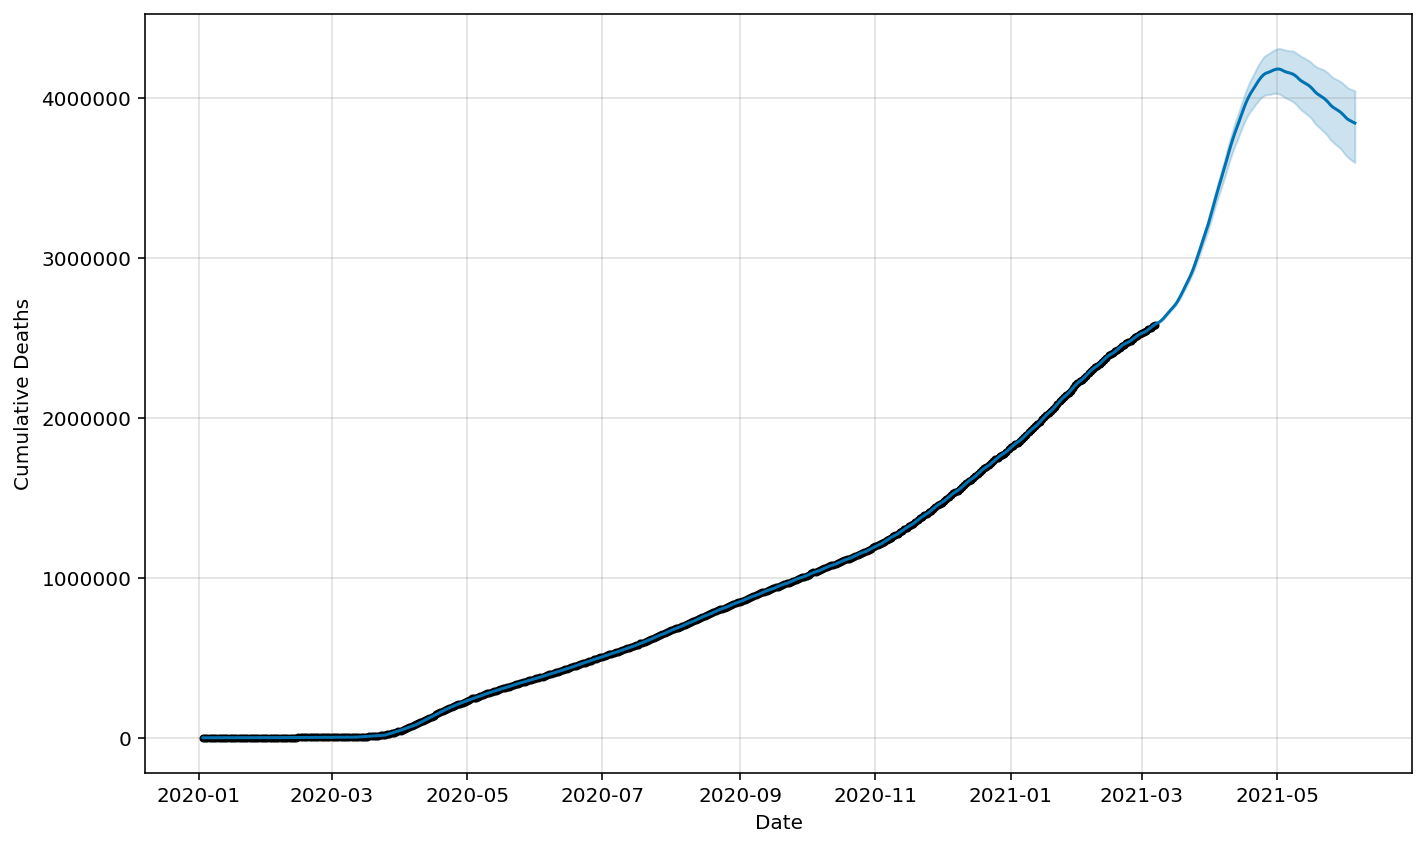

INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0

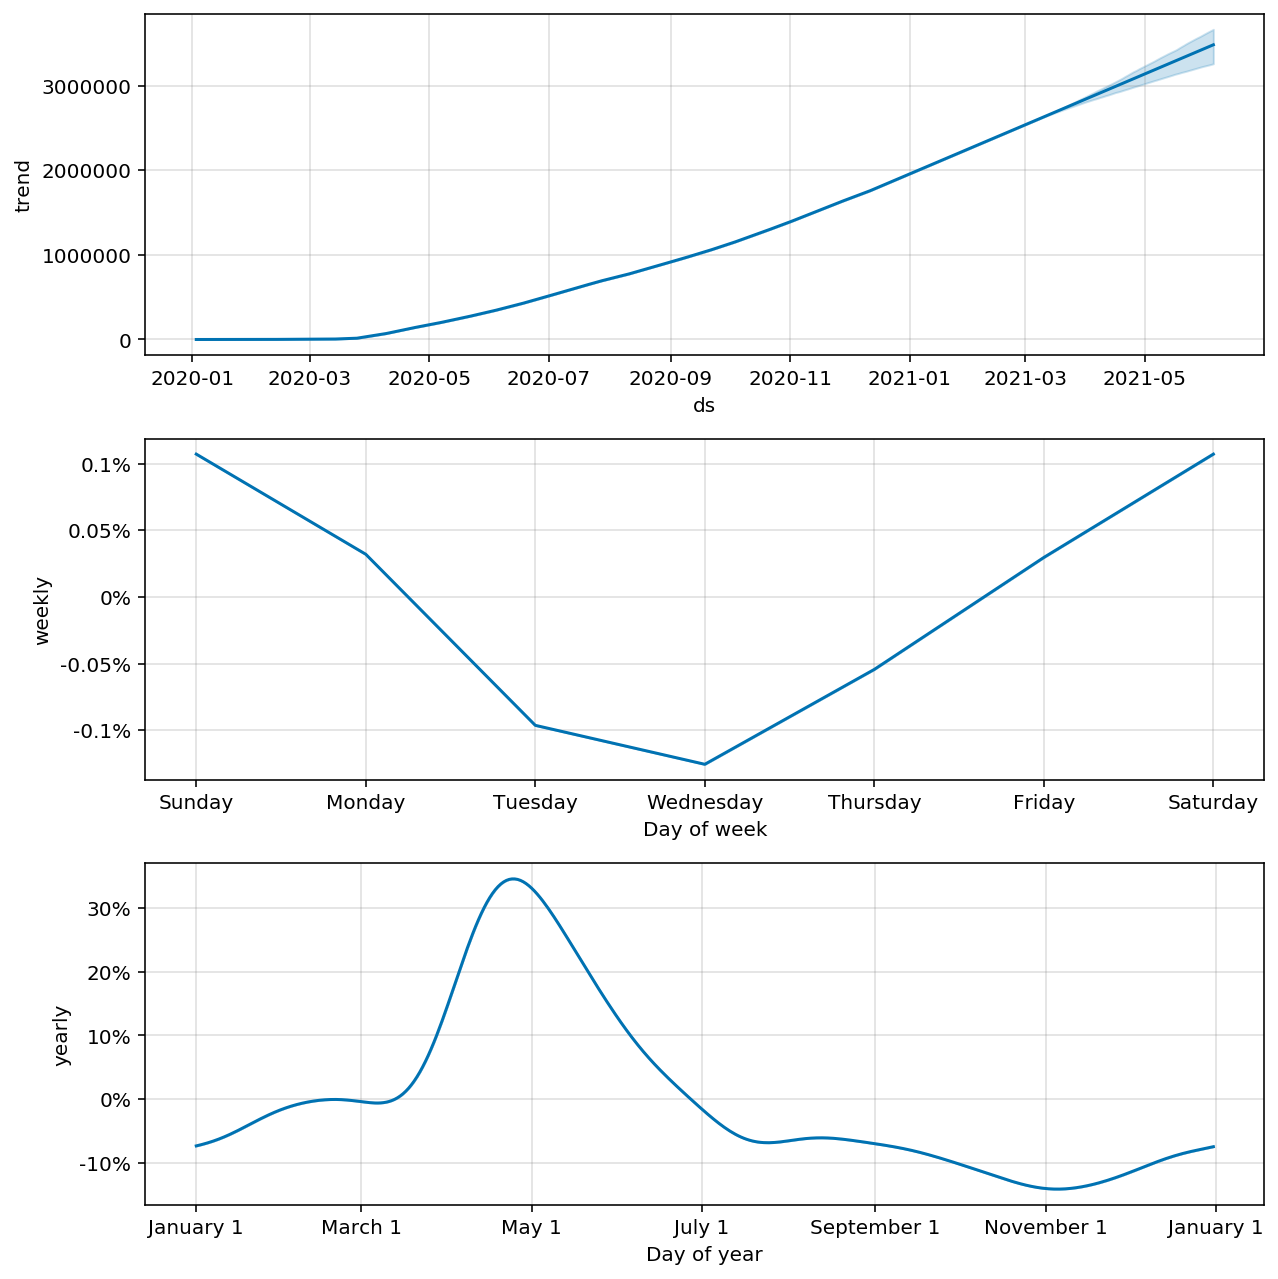

INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0
INFO:py4j.java_gateway:Received command c on object id p0

In [0]:
# FORECASTING WITH DEEP LEARNING
!pip install matplotlib==3.1.3

%config InlineBackend.figure_format = 'retina'

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

def forecast():
    
    dbutils.widgets.text("forecast_component", "What do you want to forecast:\n\n - New Cases \n - Cumulative Cases \n - New Deaths \n - Cumulative Deaths\n\n")
    
    forecast_component = dbutils.widgets.get("forecast_component")
    
    
    if forecast_component == 'New Cases' or forecast_component == 'new cases' or forecast_component == 'New cases':

        dl_data = time_series_dates.reset_index()
        dl_data = dl_data[['Date_reported', 'New_cases']]
        dl_data = dl_data.rename(columns = {'Date_reported': 'ds', 'New_cases': 'y'})
        dl_data_length = len(dl_data)

        m = Prophet(interval_width=0.95,
                    growth='linear',
                    daily_seasonality=False,
                    weekly_seasonality=True,
                    yearly_seasonality=True,
                    seasonality_mode='multiplicative', 
                    changepoints = [dl_data['ds'][dl_data_length - 1]],
                    changepoint_prior_scale = 1.5)
         
        m.fit(dl_data)
        future = m.make_future_dataframe(periods = 90, freq = 'd', include_history = True)
        forecast = m.predict(future)

        forecast_plot = m.plot(forecast, xlabel = 'Date', ylabel = 'New cases')
        display(forecast_plot)
        
        forecast_plot = m.plot_components(forecast)
        display(forecast_plot)
        
    elif forecast_component == 'Cumulative Cases' or forecast_component == 'cumulative cases' or forecast_component == 'Cumulative cases':
        
        dl_data = time_series_dates.reset_index()
        dl_data = dl_data[['Date_reported', 'Cumulative_cases']]
        dl_data = dl_data.rename(columns = {'Date_reported': 'ds', 'Cumulative_cases': 'y'})

        m = Prophet(interval_width=0.95,
                    growth='linear',
                    daily_seasonality=False,
                    weekly_seasonality=True,
                    yearly_seasonality=True,
                    seasonality_mode='multiplicative',
                    changepoint_prior_scale = 1.5)
        
        m.fit(dl_data)
        future = m.make_future_dataframe(periods = 90)
        forecast = m.predict(future)

        forecast_plot = m.plot(forecast, xlabel = 'Date', ylabel = 'Cumulative Cases')
        display(forecast_plot)
        
        forecast_plot = m.plot_components(forecast)
        display(forecast_plot)
        
    elif forecast_component == 'New Deaths' or forecast_component == 'new deaths' or forecast_component == 'New deaths':
        
        dl_data = time_series_dates.reset_index()
        dl_data = dl_data[['Date_reported', 'New_deaths']]
        dl_data = dl_data.rename(columns = {'Date_reported': 'ds', 'New_deaths': 'y'})

        m = Prophet(interval_width=0.95,
                    growth='linear',
                    daily_seasonality=False,
                    weekly_seasonality=True,
                    yearly_seasonality=True,
                    seasonality_mode='multiplicative',
                    changepoint_prior_scale = 1.5)
        
        m.fit(dl_data)
        future = m.make_future_dataframe(periods = 90)
        forecast = m.predict(future)

        forecast_plot = m.plot(forecast, xlabel = 'Date', ylabel = 'New Deaths')
        display(forecast_plot)
        
        forecast_plot = m.plot_components(forecast)
        display(forecast_plot)
        
    elif forecast_component == 'Cumulative Deaths'or forecast_component == 'cumulative deaths' or forecast_component == 'Cumulative deaths':
        
        dl_data = time_series_dates.reset_index()
        dl_data = dl_data[['Date_reported', 'Cumulative_deaths']]
        dl_data = dl_data.rename(columns = {'Date_reported': 'ds', 'Cumulative_deaths': 'y'})

        m = Prophet(interval_width=0.95,
                    growth='linear',
                    daily_seasonality=False,
                    weekly_seasonality=True,
                    yearly_seasonality=True,
                    seasonality_mode='multiplicative',
                    changepoint_prior_scale = 1.5)
        
        m.fit(dl_data)
        future = m.make_future_dataframe(periods = 90)
        forecast = m.predict(future)

        forecast_plot = m.plot(forecast, xlabel = 'Date', ylabel = 'Cumulative Deaths')
        display(forecast_plot)
        
        forecast_plot = m.plot_components(forecast)
        display(forecast_plot)
        
    else:
        print('What do you want to forecast:\n\n - New Cases \n - Cumulative Cases \n - New Deaths \n - Cumulative Deaths\n\n')
        
forecast()

In [0]:
#Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

#Why Spark ML?
#Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.


In [0]:
import logging
logging.getLogger("py4j").setLevel(logging.ERROR)

#pyspark_log = logging.getLogger('pyspark')
#pyspark_log.setLevel(logging.ERROR)

In [0]:
#Initializing Spark Connections

!apt install libkrb5-dev -y
!wget https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
!tar xf spark-3.0.2-bin-hadoop3.2.tgz

!python -m pip install --upgrade pip
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
#!pip install folium --user
!pip install networkx
!pip install pymongo
!pip install lxml

Reading package lists... 0%Reading package lists... 0%Reading package lists... 0%Reading package lists... 6%Reading package lists... 6%Reading package lists... 6%Reading package lists... 6%Reading package lists... 41%Reading package lists... 58%Reading package lists... 58%Reading package lists... 59%Reading package lists... 59%Reading package lists... 69%Reading package lists... 69%Reading package lists... 71%Reading package lists... 71%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 81%Reading package lists... 90%Reading package lists... 90%Reading package lists... 91%Reading package lists... 91%Reading package lists... 97%Reading package lists... 98%Reading package lists... 98%Reading package lists... 98%Reading package lists... 98%Reading package lists... 99%Reading package lists... 99%Reading package lists... Done
Building dependency tree... 0%Building dependency tree... 0%Building dependency tree... 50%Building dependency tree... 50%Building dependency tree 
Reading state information... 0%Reading state information... 0%Reading state information... Done
The following packages were automatically installed and are no longer required:
 libcap2-bin libpam-cap
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
 comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
 libkdb5-9
Suggested packages:
 doc-base krb5-doc krb5-user
The following NEW packages will be installed:
 comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
 libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 12 not upgraded.
Need to get 349 kB of archives.
After this operation, 1992 kB of additional disk space will be used.
 0% [Working]  Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
 3% [1 libgssrpc4 14.2 kB/54.4 kB 26%]  15% [Working]  Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
 16% [2 libkdb5-9 2615 B/37.3 kB 7%]  27% [Waiting for headers]  Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5srv-mit11 amd64 1.16-2ubuntu0.2 [49.7 kB]
 27% [3 libkadm5srv-mit11 2702 B/49.7 kB 5%]  41% [Working]  Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5clnt-mit11 amd64 1.16-2ubuntu0.2 [38.0 kB]
 41% [4 libkadm5clnt-mit11 1949 B/38.0 kB 5%]  53% [Working]  Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 comerr-dev amd64 2.1-1.44.1-1ubuntu1.3 [38.5 kB]
 53% [5 comerr-dev 2764 B/38.5 kB 7%]  64% [Working]  Get:6 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 krb5-multidev amd64 1.16-2ubuntu0.2 [120 kB]
 65% [6 krb5-multidev 1637 B/120 kB 1%]  94% [Working]  Get:7 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkrb5-dev amd64 1.16-2ubuntu0.2 [11.7 kB]
 95% [7 libkrb5-dev 496 B/11.7 kB 4%]  100% [Working]  Fetched 349 kB in 1s (288 kB/s)
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package libgssrpc4:amd64.
(Reading database ... (Reading database ... 5%(Reading database ... 10%(Reading database ... 15%(Reading database ... 20%(Reading database ... 25%(Reading database ... 30%(Reading database ... 35%(Reading database ... 40%(Reading database ... 45%(Reading database ... 50%(Reading database ... 55%(Reading database ... 60%(Reading database ... 65%(Reading database ... 70%(Reading database ... 75%(Reading database ... 80%(Reading database ... 85%(Reading database ... 90%(Reading database ... 95%(Reading database ... 100%(Reading database ... 93736 files and director

In [0]:
!apt update
!apt install gcc python-dev libkrb5-dev


0% [Working]  Hit:1 https://repos.azul.com/zulu/deb stable InRelease
 0% [Connecting to archive.ubuntu.com (91.189.88.142)] [Connecting to security.u 0% [1 InRelease gpgv 3191 B] [Connecting to archive.ubuntu.com (91.189.88.142)]  0% [Waiting for headers] [Waiting for headers]  Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
 0% [Waiting for headers] [2 InRelease 14.2 kB/88.7 kB 16%]  Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
  0% [2 InRelease 14.2 kB/88.7 kB 16%] 0% [3 InRelease gpgv 242 kB] [Waiting for headers] [2 InRelease 14.2 kB/88.7 kB  0% [Waiting for headers] [2 InRelease 43.1 kB/88.7 kB 49%]  Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
 0% [4 InRelease 15.6 kB/88.7 kB 18%] [2 InRelease 43.1 kB/88.7 kB 49%]  0% [4 InRelease 18.5 kB/88.7 kB 21%] 0% [2 InRelease gpgv 88.7 kB] [4 InRelease 21.4 kB/88.7 kB 24%]  0% [4 InRelease 47.5 kB/88.7 kB 54%]  0% [Waiting for headers] 0% [4 InRelease gpgv 88.7 kB] [Waiting for headers] [Waiting for headers]  Get:5 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [324 kB]
 0% [4 InRelease gpgv 88.7 kB] [Waiting for headers] [5 Packages 0 B/324 kB 0%]  0% [Waiting for headers] [5 Packages 56.3 kB/324 kB 17%]  Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
 0% [6 InRelease 2602 B/74.6 kB 3%] [5 Packages 56.3 kB/324 kB 17%]  0% [5 Packages 117 kB/324 kB 36%] 0% [6 InRelease gpgv 74.6 kB] [Waiting for headers] [5 Packages 117 kB/324 kB 3  21% [Waiting for headers] [5 Packages 263 kB/324 kB 81%]  Get:7 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [353 kB]
 21% [7 Packages 2687 B/353 kB 1%] [5 Packages 272 kB/324 kB 84%]  22% [7 Packages 60.6 kB/353 kB 17%] 22% [5 Packages store 0 B] [7 Packages 60.6 kB/353 kB 17%] [Waiting for headers  22% [7 Packages 69.3 kB/353 kB 20%] [Waiting for headers]  Get:8 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1396 kB]
 23% [7 Packages 130 kB/353 kB 37%] [8 Packages 5581 B/1396 kB 0%]  29% [8 Packages 470 kB/1396 kB 34%]  Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [31.4 kB]
 29% [9 Packages 360 B/31.4 kB 1%] [8 Packages 470 kB/1396 kB 34%] 29% [7 Packages store 0 B] [9 Packages 360 B/31.4 kB 1%] [8 Packages 470 kB/139  30% [7 Packages store 0 B] [8 Packages 536 kB/1396 kB 38%]  Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2394 kB]
 30% [7 Packages store 0 B] [10 Packages 6409 B/2394 kB 0%] [8 Packages 536 kB/1  32% [10 Packages 70.1 kB/2394 kB 3%] [8 Packages 647 kB/1396 kB 46%] 32% [9 Packages store 0 B] [10 Packages 70.1 kB/2394 kB 3%] [8 Packages 647 kB/  33% [10 Packages 84.6 kB/2394 kB 4%] [8 Packages 669 kB/1396 kB 48%]  43% [10 Packages 525 kB/2394 kB 22%]  Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1963 kB]
 43% [10 Packages 525 kB/2394 kB 22%] [11 Packages 12.4 kB/1963 kB 1%] 44% [8 Packages store 0 B] [10 Packages 525 kB/2394 kB 22%] [11 Packages 34.1 k  74% [10 Packages 1963 kB/2394 kB 82%] [11 Packages 1938 kB/1963 kB 99%]  75% [10 Packages 2016 kB/2394 kB 84%]  Get:12 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [24.5 kB]
 75% [10 Packages 2016 kB/2394 kB 84%] [12 Packages 24.5 kB/24.5 kB 100%] 75% [11 Packages store 0 B] [10 Packages 2016 kB/2394 kB 84%] [12 Packages 24.5  75% [11 Packages store 0 B] [10 Packages 2029 kB/2394 kB 85%]  79% [11 Packages store 0 B]  Get:13 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2163 kB]
 79% [11 Packages store 0 B] [13 Packages 4096 B/2163 kB 0%]  98% [13 Packages 2163 kB/2163 kB 100%]  98% [Working] 98% [12 Packages store 0 B]  99% [Working] 99% [10 Packages store 0 B]  99% [Working] 99% [13 Packages store 0 B]  100% [Working]  Fetched 8901 kB in 3

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

#initializing the spark session
spark = SparkSession.builder.appName('TSA_COVID').getOrCreate()

In [0]:
%load_ext sparkmagic.magics

In [0]:
# Import libraries

import pandas as pd
import numpy as np
import gc
import time 
import datetime as dt # dealing with dates
import warnings
import folium

#graph section
import networkx as nx
import matplotlib
import plotly # visualization
import plotly.express as px # plotly components
import plotly.graph_objects as go # plotly components
import json # JSON parsing

# HTML parsing
from lxml import etree
import urllib

# SQLite RDBMS
import sqlite3

# Time conversions
import time

# Parallel processing
# PyMongo is a Python distribution containing tools for working with MongoDB, 
# and is the recommended way to work with MongoDB from Python. 
# MongoDB is a source-available cross-platform document-oriented database program. Classified 
# as a NoSQL database program, MongoDB uses JSON-like documents with optional schemas
# NoSQL DB, an open-source document database and leading NoSQL database.
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

# # The OS module in python provides functions for interacting with the operating system. OS, comes under Python's standard utility modules. This module provides a portable way of using operating system dependent functionality
import os
os.environ['SPARK_HOME'] = "/content/spark-3.0.1-bin-hadoop3.2" #change this here

# PySpark is the Python API written in python to support Apache Spark.
# Apache Spark is written in Scala and can be integrated with Python, Scala, Java, R, SQL languages
# SQLContext is a class and is used for initializing the functionalities of Spark SQL. 
# SparkContext class object (sc) is required for initializing SQLContext class object.
import pyspark
from pyspark.sql import SQLContext

In [0]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('TSA_COVID').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('TSA_COVID').getOrCreate()
    sqlContext=SQLContext(spark)

In [0]:
# The comma separated files are warehoused to the databricks distributed file system.  Then the stored data files are read and constructed spark data frames for further data wrangling. 

time_series=spark.read.csv("/FileStore/tables/WHO_COVID_19_global_data-1.csv",inferSchema=True, header=True)
time_series.show()
display(time_series)
time_series.printSchema()

+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
Date_reported|Country_code| Country|WHO_region|New_cases|Cumulative_cases|New_deaths|Cumulative_deaths|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
 2020-01-03| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-04| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-05| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-06| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-07| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-08| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-09| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-10| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-11| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-12| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-13| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-14| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-15| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-16| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-17| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-18| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-19| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-20| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-21| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-22| AF|Afghanistan| EMRO| 0| 0| 0| 0|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
only showing top 20 rows

Date_reported Country_code Country WHO_region New_cases Cumulative_cases New_deaths Cumulative_deaths 2020-01-03 AF Afghanistan EMRO 0 0 0 0 2020-01-04 AF Afghanistan EMRO 0 0 0 0 2020-01-05 AF Afghanistan EMRO 0 0 0 0 2020-01-06 AF Afghanistan EMRO 0 0 0 0 2020-01-07 AF Afghanistan EMRO 0 0 0 0 2020-01-08 AF Afghanistan EMRO 0 0 0 0 2020-01-09 AF Afghanistan EMRO 0 0 0 0 2020-01-10 AF Afghanistan EMRO 0 0 0 0 2020-01-11 AF Afghanistan EMRO 0 0 0 0 2020-01-12 AF Afghanistan EMRO 0 0 0 0 2020-01-13 AF Afghanistan EMRO 0 0 0 0 2020-01-14 AF Afghanistan EMRO 0 0 0 0 2020-01-15 AF Afghanistan EMRO 0 0 0 0 2020-01-16 AF Afghanistan EMRO 0 0 0 0 2020-01-17 AF Afghanistan EMRO 0 0 0 0 2020-01-18 AF Afghanistan EMRO 0 0 0 0 2020-01-19 AF Afghanistan EMRO 0 0 0 0 2020-01-20 AF Afghanistan EMRO 0 0 0 0 2020-01-21 AF Afghanistan EMRO 0 0 0 0 2020-01-22 AF Afghanistan EMRO 0 0 0 0 2020-01-23 AF Afghanistan EMRO 0 0 0 0 2020-01-24 AF Afghanistan EMRO 0 0 0 0 2020-01-25 AF Afghanistan EMRO 0 0 0 0 2020-01-26 AF Afghanistan EMRO 0 0 0 0 2020-01-27 AF Afghanistan EMRO 0 0 0 0 2020-01-28 AF Afghanistan EMRO 0 0 0 0 2020-01-29 AF Afghanistan EMRO 0 0 0 0 2020-01-30 AF Afghanistan EMRO 0 0 0 0 2020-01-31 AF Afghanistan EMRO 0 0 0 0 2020-02-01 AF Afghanistan EMRO 0 0 0 0 2020-02-02 AF Afghanistan EMRO 0 0 0 0 2020-02-03 AF Afghanistan EMRO 0 0 0 0 2020-02-04 AF Afghanistan EMRO 0 0 0 0 2020-02-05 AF Afghanistan EMRO 0 0 0 0 2020-02-06 AF Afghanistan EMRO 0 0 0 0 2020-02-07 AF Afghanistan EMRO 0 0 0 0 2020-02-08 AF Afghanistan EMRO 0 0 0 0 2020-02-09 AF Afghanistan EMRO 0 0 0 0 2020-02-10 AF Afghanistan EMRO 0 0 0 0 2020-02-11 AF Afghanistan EMRO 0 0 0 0 2020-02-12 AF Afghanistan EMRO 0 0 0 0 2020-02-13 AF Afghanistan EMRO 0 0 0 0 2020-02-14 AF Afghanistan EMRO 0 0 0 0 2020-02-15 AF Afghanistan EMRO 0 0 0 0 2020-02-16 AF Afghanistan EMRO 0 0 0 0 2020-02-17 AF Afghanistan EMRO 0 0 0 0 2020-02-18 AF Afghanistan EMRO 0 0 0 0 2020-02-19 AF Afghanistan EMRO 0 0 0 0 2020-02-20 AF Afghanistan EMRO 0 0 0 0 2020-02-21 AF Afghanistan EMRO 0 0 0 0 2020-02-22 AF Afghanistan EMRO 0 0 0 0 2020-02-23 AF Afghanistan EMRO 0 0 0 0 2020-02-24 AF Afghanistan EMRO 5 5 0 0 2020-02-25 AF Afghanistan EMRO 0 5 0 0 2020-02-26 AF Afghanistan EMRO 0 5 0 0 2020-02-27 AF Afghanistan EMRO 0 5 0 0 2020-02-28 AF Afghanistan EMRO 0 5 0 0 2020-02-29 AF Afghanistan EMRO 0 5 0 0 2020-03-01 AF Afghanistan EMRO 0 5 0 0 2020-03-02 AF Afghanistan EMRO 0 5 0 0 2020-03-03 AF Afghanistan EMRO 0 5 0 0 2020-03-04 AF Afghanistan EMRO 0 5 0 0 2020-03-05 AF Afghanistan EMRO 0 5 0 0 2020-03-06 AF Afghanistan EMRO 0 5 0 0 2020-03-07 AF Afghanistan EMRO 3 8 0 0 2020-03-08 AF Afghanistan EMRO 0 8 0 0 2020-03-09 AF Afghanistan EMRO 0 8 0 0 2020-03-10 AF Afghanistan EMRO 0 8 0 0 2020-03-11 AF Afghanistan EMRO 3 11 0 0 2020-03-12 AF Afghanistan EMRO 0 11 0 0 2020-03-13 AF Afghanistan EMRO 0 11 0 0 2020-03-14 AF Afghanistan EMRO 3 14 0 0 2020-03-15 AF Afghanistan EMRO 6 20 0 0 2020-03-16 AF Afghanistan EMRO 5 25 0 0 2020-03-17 AF Afghanistan EMRO 1 26 0 0 2020-03-18 AF Afghanistan EMRO 0 26 0 0 2020-03-19 AF Afghanistan EMRO 0 26 0 0 2020-03-20 AF Afghanistan EMRO -2 24 0 0 2020-03-21 AF Afghanistan EMRO 0 24 0 0 2020-03-22 AF Afghanistan EMRO 10 34 0 0 2020-03-23 AF Afghanistan EMRO 6 40 1 1 2020-03-24 AF Afghanistan EMRO 2 42 0 1 2020-03-25 AF Afghanistan EMRO 32 74 0 1 2020-03-26 AF Afghanistan EMRO 6 80 1 2 2020-03-27 AF Afghanistan EMRO 11 91 0 2 2020-03-28 AF Afghanistan EMRO 15 106 1 3 2020-03-29 AF Afghanistan EMRO 8 114 1 4 2020-03-30 AF Afghanistan EMRO 0 114 0 4 2020-03-31 AF Afghanistan EMRO 52 166 0 4 2020-04-01 AF Afghanistan EMRO 26 192 0 4 2020-04-02 AF Afghanistan EMRO 43 235 0 4 2020-04-03 AF Afghanistan EMRO 34 269 1 5 2020-04-04 AF Afghanistan EMRO 1 270 0 5 2020-04-05 AF Afghanistan EMRO 29 299 2 7 2020-04-06 AF Afghanistan EMRO 38 337 0 7 2020-04-07 AF Afghanistan EMRO 30 367 4 11 2020-04-08 AF Afghanistan EMRO 56 423 3 14 2020-04-09 AF Afghanistan EMRO 61 484 1 15 2020-04-10 AF Af

root
-- Date_reported: string (nullable = true)
-- Country_code: string (nullable = true)
-- Country: string (nullable = true)
-- WHO_region: string (nullable = true)
-- New_cases: integer (nullable = true)
-- Cumulative_cases: integer (nullable = true)
-- New_deaths: integer (nullable = true)
-- Cumulative_deaths: integer (nullable = true)

In [0]:
# Data is aggregated by Date_reported

time_series.printSchema()
time_series = time_series.groupby('Date_reported').sum()

root
-- Date_reported: string (nullable = true)
-- Country_code: string (nullable = true)
-- Country: string (nullable = true)
-- WHO_region: string (nullable = true)
-- New_cases: integer (nullable = true)
-- Cumulative_cases: integer (nullable = true)
-- New_deaths: integer (nullable = true)
-- Cumulative_deaths: integer (nullable = true)

In [0]:
# Columns display in the dataframe
time_series.columns

Out[29]: ['Date_reported',
 'Country_code',
 'Country',
 'WHO_region',
 'New_cases',
 'Cumulative_cases',
 'New_deaths',
 'Cumulative_deaths']

In [0]:
# Coverting the data columns into featureassembler before implementing ML model

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

featureassembler=VectorAssembler(inputCols=["sum(New_cases)","sum(Cumulative_cases)"],outputCol="independent_features")

In [0]:
Output=featureassembler.transform(time_series)
Output.show(100)

+-------------+--------------+---------------------+---------------+----------------------+--------------------+
Date_reported|sum(New_cases)|sum(Cumulative_cases)|sum(New_deaths)|sum(Cumulative_deaths)|independent_features|
+-------------+--------------+---------------------+---------------+----------------------+--------------------+
 2020-02-26| 939| 81349| 65| 2770| [939.0,81349.0]|
 2020-04-13| 73299| 1802847| 5731| 116781| [73299.0,1802847.0]|
 2020-06-24| 134914| 9115855| 3969| 472320|[134914.0,9115855.0]|
 2020-06-08| 131297| 6918409| 3500| 401297|[131297.0,6918409.0]|
 2020-09-12| 313493| 28710582| 5883| 914054|[313493.0,2.87105...|
 2020-11-12| 595597| 52687539| 9963| 1284372|[595597.0,5.26875...|
 2020-01-05| 0| 1| 0| 0| [0.0,1.0]|
 2020-04-12| 79055| 1729548| 6403| 111050| [79055.0,1729548.0]|
 2020-06-20| 140582| 8510647| 5029| 455698|[140582.0,8510647.0]|
 2020-06-22| 153373| 8848949| 4081| 464505|[153373.0,8848949.0]|
 2021-02-18| 381032| 109634159| 10000| 2425883|[381032.0,1.09634...|
 2020-01-03| 0| 0| 0| 0| (2,[],[])|
 2020-02-13| 15213| 60465| 256| 1371| [15213.0,60465.0]|
 2020-04-20| 72488| 2336740| 5174| 167780| [72488.0,2336740.0]|
 2020-12-22| 540389| 77196651| 9256| 1703180|[540389.0,7.71966...|
 2021-01-15| 735595| 92773036| 15760| 1990305|[735595.0,9.27730...|
 2020-07-25| 286301| 15600852| 6181| 631561|[286301.0,1.56008...|
 2020-12-17| 653446| 73768275| 12710| 1646645|[653446.0,7.37682...|
 2020-12-25| 683093| 79133834| 12137| 1740282|[683093.0,7.91338...|
 2021-02-13| 432033| 107908266| 13382| 2376206|[432033.0,1.07908...|
 2020-09-11| 303123| 28397089| 6162| 908171|[303123.0,2.83970...|
 2020-01-12| 0| 45| 0| 1| [0.0,45.0]|
 2020-06-09| 108361| 7026770| 3551| 404848|[108361.0,7026770.0]|
 2020-11-10| 462990| 51568543| 6846| 1265343|[462990.0,5.15685...|
 2020-01-22| 154| 466| 3| 9| [154.0,466.0]|
 2020-08-06| 268926| 18702643| 6391| 698581|[268926.0,1.87026...|
 2020-09-20| 335044| 31125306| 5799| 956742|[335044.0,3.11253...|
 2020-11-29| 604660| 62865369| 9550| 1452983|[604660.0,6.28653...|
 2021-02-10| 354068| 106618900| 11132| 2336648|[354068.0,1.06618...|
 2020-01-06| 3| 4| 0| 0| [3.0,4.0]|
 2020-12-15| 508344| 72516233| 8828| 1622143|[508344.0,7.25162...|
 2020-05-14| 83251| 4275781| 4813| 294368| [83251.0,4275781.0]|
 2020-06-12| 137035| 7397621| 4895| 418529|[137035.0,7397621.0]|
 2020-11-19| 623020| 56877486| 10587| 1349065|[623020.0,5.68774...|
 2020-12-16| 598596| 73114829| 11792| 1633935|[598596.0,7.31148...|
 2020-04-22| 72993| 2484343| 6763| 179993| [72993.0,2484343.0]|
 2020-09-06| 316809| 27094850| 5608| 878631|[316809.0,2.70948...|
 2020-10-18| 423671| 40275178| 6210| 1110106|[423671.0,4.02751...|
 2020-01-16| 0| 51| 0| 1| [0.0,51.0]|
 2020-08-29| 295445| 24844153| 5950| 835361|[295445.0,2.48441...|
 2020-09-14| 289743| 29322146| 4910| 924641|[289743.0,2.93221...|
 2020-10-24| 501178| 42799202| 6712| 1144475|[501178.0,4.27992...|
 2020-05-30| 116912| 5832136| 4809| 363212|[116912.0,5832136.0]|
 2020-03-16| 11157| 172381| 707| 6712| [11157.0,172381.0]|
 2020-05-13| 75794| 4192530| 4258| 289555| [75794.0,4192530.0]|
 2020-04-19| 81773| 2264252| 6939| 162606| [81773.0,2264252.0]|
 2020-06-28| 191307| 9834521| 4578| 493997|[191307.0,9834521.0]|
 2020-10-20| 329134| 40970639| 4288| 1119172|[329134.0,4.09706...|
 2020-03-03| 2234| 92066| 68| 3125| [2234.0,92066.0]|
 2020-08-05| 217603| 18433717| 5063| 692190|[217603.0,1.84337...|
 2020-09-16| 263057| 29836847| 4591| 933592|[263057.0,2.98368...|
 2020-10-21| 391870| 41362509| 5382| 1124554|[391870.0,4.13625...|
 2020-10-29| 513786| 45130630| 7248| 1174699|[513786.0,4.51306...|
 2020-11-15| 633766| 54650413| 8884| 1312912|[633766.0,5.46504...|
 2021-01-12| 586523| 90679702| 10732| 1945553|[586523.0,9.06797...|
 2020-08-25| 218334| 23759613| 4118| 812167|[218334.0,2.37596...|
 2020-06-16| 118156| 7926467| 3285| 435043|[118156.0,7926467.0]|
 2020-12-12| 668549| 70726577| 12201| 1592653|[668549.0,7.07265...|
 2020-03-06| 3649| 100165| 105| 3

In [0]:
Output.select("independent_features").show(100)

+--------------------+
independent_features|
+--------------------+
 [939.0,81349.0]|
 [73299.0,1802847.0]|
[134914.0,9115855.0]|
[131297.0,6918409.0]|
[313493.0,2.87105...|
[595597.0,5.26875...|
 [0.0,1.0]|
 [79055.0,1729548.0]|
[140582.0,8510647.0]|
[153373.0,8848949.0]|
[381032.0,1.09634...|
 (2,[],[])|
 [15213.0,60465.0]|
 [72488.0,2336740.0]|
[540389.0,7.71966...|
[735595.0,9.27730...|
[286301.0,1.56008...|
[653446.0,7.37682...|
[683093.0,7.91338...|
[432033.0,1.07908...|
[303123.0,2.83970...|
 [0.0,45.0]|
[108361.0,7026770.0]|
[462990.0,5.15685...|
 [154.0,466.0]|
[268926.0,1.87026...|
[335044.0,3.11253...|
[604660.0,6.28653...|
[354068.0,1.06618...|
 [3.0,4.0]|
[508344.0,7.25162...|
 [83251.0,4275781.0]|
[137035.0,7397621.0]|
[623020.0,5.68774...|
[598596.0,7.31148...|
 [72993.0,2484343.0]|
[316809.0,2.70948...|
[423671.0,4.02751...|
 [0.0,51.0]|
[295445.0,2.48441...|
[289743.0,2.93221...|
[501178.0,4.27992...|
[116912.0,5832136.0]|
 [11157.0,172381.0]|
 [75794.0,4192530.0]|
 [81773.0,2264252.0]|
[191307.0,9834521.0]|
[329134.0,4.09706...|
 [2234.0,92066.0]|
[217603.0,1.84337...|
[263057.0,2.98368...|
[391870.0,4.13625...|
[513786.0,4.51306...|
[633766.0,5.46504...|
[586523.0,9.06797...|
[218334.0,2.37596...|
[118156.0,7926467.0]|
[668549.0,7.07265...|
 [3649.0,100165.0]|
 [58218.0,503277.0]|
[697590.0,9.00931...|
 [92405.0,4456611.0]|
 [17.0,73.0]|
[232225.0,1.25675...|
[336578.0,3.53479...|
 [3258.0,20723.0]|
 [3919.0,24642.0]|
[181245.0,9643214.0]|
 [2395.0,96516.0]|
[529803.0,9.59306...|
 [2418.0,89832.0]|
 [93951.0,2731917.0]|
[177910.0,9461969.0]|
[634755.0,9.85270...|
 [829.0,80410.0]|
[492163.0,6.38916...|
 [88425.0,4364206.0]|
[289720.0,2.05765...|
 [90655.0,4817709.0]|
 [85592.0,1559697.0]|
 [72206.0,2556549.0]|
[119410.0,8045877.0]|
[238118.0,1.36296...|
[243308.0,3.37710...|
 [1116.0,78027.0]|
 [32860.0,445059.0]|
 [86286.0,4039456.0]|
[294281.0,2.08708...|
[362024.0,3.90193...|
[565470.0,5.93624...|
[509999.0,6.81451...|
[602813.0,5.05684...|
 [88198.0,3953170.0]|
[486249.0,5.98486...|
 [74610.0,2411350.0]|
 [88523.0,5415666.0]|
[452746.0,8.02023...|
 [0.0,4.0]|
 [1860.0,75378.0]|
[467302.0,1.05551...|
+--------------------+
only showing top 100 rows

In [0]:
# Now taking the independent feature and dependant variable for predictions through Linear regression

finalized_data=Output.select("independent_features","sum(Cumulative_deaths)")

In [0]:
# Splitting the data set into 75% training and 25% test. 
train_data,test_data=finalized_data.randomSplit([0.75,0.25])

In [0]:
#Implementation of Linear regression model on Training data set 
regressor=LinearRegression(featuresCol="independent_features",labelCol="sum(Cumulative_deaths)")
regressor=regressor.fit(train_data)

In [0]:
# Coefficients 
regressor.coefficients

Out[37]: DenseVector([0.3738, 0.0187])

In [0]:
# Intercepts
regressor.intercept

Out[38]: 128633.1297883645

In [0]:
# Linear Regression Model Prediction
pred_results=regressor.evaluate(test_data)

In [0]:

Linear_preadiction=pred_results.predictions

Linear_preadiction.show(1000)


+--------------------+----------------------+------------------+
independent_features|sum(Cumulative_deaths)| prediction|
+--------------------+----------------------+------------------+
 [0.0,4.0]| 0|128633.20439058998|
 [0.0,4.0]| 0|128633.20439058998|
 [0.0,51.0]| 1| 128634.0809667393|
 [82.0,219.0]| 4|128667.86959681808|
 [93.0,312.0]| 6|128673.71639981278|
 [154.0,466.0]| 9|128699.39316516598|
 [588.0,79581.0]| 2623|130337.18090895294|
 [1432.0,83971.0]| 2870|130734.58251114129|
 [1485.0,6125.0]| 132|129302.52511519726|
 [1611.0,87414.0]| 2982|130865.71473346208|
 [2055.0,94121.0]| 3216|131156.79144739616|
 [2395.0,96516.0]| 3299| 131328.5670231552|
 [2418.0,89832.0]| 3057|131212.50515246077|
 [3258.0,20723.0]| 426| 130237.6141298405|
 [4077.0,64542.0]| 1384| 131361.042379876|
 [10763.0,149388.0]| 5555| 135442.9989558529|
 [11157.0,172381.0]| 6712|136019.12635238582|
 [19383.0,207932.0]| 8316|139757.42592751025|
 [26053.0,314626.0]| 13663|144240.87832993374|
 [43100.0,357726.0]| 15537|151417.66271394785|
 [43518.0,546795.0]| 25311|155100.17220359237|
 [54473.0,412199.0]| 17673|156685.36012043597|
 [58660.0,733950.0]| 35677|164251.48667748028|
 [72267.0,2970254.0]| 214011|211046.71713601338|
 [72993.0,2484343.0]| 179993| 202255.6185230543|
 [74610.0,2411350.0]| 173230| 201498.7667461458|
 [75651.0,2017391.0]| 136466|194540.38544643755|
 [77280.0,4116736.0]| 285297|234303.33213698055|
 [81773.0,2264252.0]| 162606|201433.16301189363|
 [85592.0,1559697.0]| 97678|189720.53649534401|
 [86550.0,3197489.0]| 231726|220624.41256589815|
 [87122.0,2819039.0]| 205149| 213779.9491733304|
 [88425.0,4364206.0]| 299417|243085.29418134212|
 [91822.0,5507488.0]| 349048| 265678.0929633941|
 [92405.0,4456611.0]| 304544|246296.60420481674|
 [93951.0,2731917.0]| 198909| 214708.0667879949|
[101195.0,4653090.0]| 313150|253247.14941580372|
[108361.0,7026770.0]| 404848|300196.57939995895|
[112348.0,6183733.0]| 374284| 285963.9925918656|
[116912.0,5832136.0]| 363212|281112.74409851944|
[131992.0,8980941.0]| 468351| 345477.3004162019|
[134914.0,9115855.0]| 472320| 349085.8983289809|
[137035.0,7397621.0]| 418529| 317832.8047081306|
[140582.0,8510647.0]| 455698| 339917.3890919547|
[153373.0,8848949.0]| 464505|351008.76827797573|
[175772.0,1.05152...| 510888|390460.21834935556|
[177910.0,9461969.0]| 482649| 371614.9810548985|
[181245.0,9643214.0]| 489419| 376242.0761145402|
[203693.0,1.47794...| 608650| 480428.7343516452|
[206161.0,1.07214...| 515874| 405666.0286789914|
[217603.0,1.84337...| 692190| 553782.1250002171|
[218334.0,2.37596...| 812167| 653386.3296719675|
[220171.0,2.56278...| 850248| 688915.9787866946|
[222105.0,1.63571...| 647346| 516735.5256469247|
[222393.0,2.39820...| 816801| 659051.5220165862|
[233952.0,2.78293...| 897046| 735127.5360719608|
[244675.0,3.16627...| 965258| 810632.6117736655|
[263057.0,2.98368...| 933592| 783449.6203096682|
[264417.0,1.98349...| 724079| 597416.6588780066|
[265810.0,2.35412...| 808049| 667062.9713031824|
[267560.0,1.79934...| 683070| 564247.7190284443|
[288293.0,1.89909...| 705375| 590601.7125996167|
[289720.0,2.05765...| 740167| 620707.2139948595|
[299814.0,3.35277...| 998799| 866027.8781526268|
[308969.0,3.56569...| 1037883| 909161.4600591274|
[310404.0,3.01472...| 939548| 806939.2937357752|
[321821.0,2.90324...| 919731| 790414.9531237966|
[321877.0,3.04691...| 945554| 817231.6090742899|
[325056.0,3.80415...| 1077638| 959649.182821178|
[329134.0,4.09706...| 1119172|1015803.6292250451|
[329161.0,3.32279...| 993624| 871407.4261413915|
[335044.0,3.11253...| 956742| 834392.1184502518|
[336578.0,3.53479...| 1033282| 913720.5186064572|
[336975.0,1.11788...| 2480268| 2339525.74495918|
[360445.0,3.65680...| 1052341| 945399.1568283734|
[366327.0,4.06415...| 1114884|1023569.5352307552|
[367356.0,1.03164...| 2237869|2190050.7913876837|
[378824.0,1.10809...| 2456947| 2336912.398380799|
[381032.0,1.09634...| 2425883| 2315818.316759733|
[422146.0,3.98515...| 1103896| 1029703.318783244|
[431392.0,1.03596...| 2250438| 22

In [0]:
#Unsupervised learning: K-Means clustering 
#In case of unsupervised learning we just need a set of features , no labels required.

# Import clustering Algorithm

from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.ml.evaluation import ClusteringEvaluator

from numpy import array
from math import sqrt
from pyspark import SparkContext, SparkConf
conf= SparkConf().setAppName('KMeans')

In [0]:
# Load the data in spark dataframes
clustering=spark.read.csv("/FileStore/tables/WHO_COVID_19_global_data-1.csv",inferSchema=True, header=True)
clustering.show()
display(clustering)

+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
Date_reported|Country_code| Country|WHO_region|New_cases|Cumulative_cases|New_deaths|Cumulative_deaths|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
 2020-01-03| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-04| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-05| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-06| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-07| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-08| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-09| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-10| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-11| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-12| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-13| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-14| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-15| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-16| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-17| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-18| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-19| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-20| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-21| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-22| AF|Afghanistan| EMRO| 0| 0| 0| 0|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
only showing top 20 rows

Date_reported Country_code Country WHO_region New_cases Cumulative_cases New_deaths Cumulative_deaths 2020-01-03 AF Afghanistan EMRO 0 0 0 0 2020-01-04 AF Afghanistan EMRO 0 0 0 0 2020-01-05 AF Afghanistan EMRO 0 0 0 0 2020-01-06 AF Afghanistan EMRO 0 0 0 0 2020-01-07 AF Afghanistan EMRO 0 0 0 0 2020-01-08 AF Afghanistan EMRO 0 0 0 0 2020-01-09 AF Afghanistan EMRO 0 0 0 0 2020-01-10 AF Afghanistan EMRO 0 0 0 0 2020-01-11 AF Afghanistan EMRO 0 0 0 0 2020-01-12 AF Afghanistan EMRO 0 0 0 0 2020-01-13 AF Afghanistan EMRO 0 0 0 0 2020-01-14 AF Afghanistan EMRO 0 0 0 0 2020-01-15 AF Afghanistan EMRO 0 0 0 0 2020-01-16 AF Afghanistan EMRO 0 0 0 0 2020-01-17 AF Afghanistan EMRO 0 0 0 0 2020-01-18 AF Afghanistan EMRO 0 0 0 0 2020-01-19 AF Afghanistan EMRO 0 0 0 0 2020-01-20 AF Afghanistan EMRO 0 0 0 0 2020-01-21 AF Afghanistan EMRO 0 0 0 0 2020-01-22 AF Afghanistan EMRO 0 0 0 0 2020-01-23 AF Afghanistan EMRO 0 0 0 0 2020-01-24 AF Afghanistan EMRO 0 0 0 0 2020-01-25 AF Afghanistan EMRO 0 0 0 0 2020-01-26 AF Afghanistan EMRO 0 0 0 0 2020-01-27 AF Afghanistan EMRO 0 0 0 0 2020-01-28 AF Afghanistan EMRO 0 0 0 0 2020-01-29 AF Afghanistan EMRO 0 0 0 0 2020-01-30 AF Afghanistan EMRO 0 0 0 0 2020-01-31 AF Afghanistan EMRO 0 0 0 0 2020-02-01 AF Afghanistan EMRO 0 0 0 0 2020-02-02 AF Afghanistan EMRO 0 0 0 0 2020-02-03 AF Afghanistan EMRO 0 0 0 0 2020-02-04 AF Afghanistan EMRO 0 0 0 0 2020-02-05 AF Afghanistan EMRO 0 0 0 0 2020-02-06 AF Afghanistan EMRO 0 0 0 0 2020-02-07 AF Afghanistan EMRO 0 0 0 0 2020-02-08 AF Afghanistan EMRO 0 0 0 0 2020-02-09 AF Afghanistan EMRO 0 0 0 0 2020-02-10 AF Afghanistan EMRO 0 0 0 0 2020-02-11 AF Afghanistan EMRO 0 0 0 0 2020-02-12 AF Afghanistan EMRO 0 0 0 0 2020-02-13 AF Afghanistan EMRO 0 0 0 0 2020-02-14 AF Afghanistan EMRO 0 0 0 0 2020-02-15 AF Afghanistan EMRO 0 0 0 0 2020-02-16 AF Afghanistan EMRO 0 0 0 0 2020-02-17 AF Afghanistan EMRO 0 0 0 0 2020-02-18 AF Afghanistan EMRO 0 0 0 0 2020-02-19 AF Afghanistan EMRO 0 0 0 0 2020-02-20 AF Afghanistan EMRO 0 0 0 0 2020-02-21 AF Afghanistan EMRO 0 0 0 0 2020-02-22 AF Afghanistan EMRO 0 0 0 0 2020-02-23 AF Afghanistan EMRO 0 0 0 0 2020-02-24 AF Afghanistan EMRO 5 5 0 0 2020-02-25 AF Afghanistan EMRO 0 5 0 0 2020-02-26 AF Afghanistan EMRO 0 5 0 0 2020-02-27 AF Afghanistan EMRO 0 5 0 0 2020-02-28 AF Afghanistan EMRO 0 5 0 0 2020-02-29 AF Afghanistan EMRO 0 5 0 0 2020-03-01 AF Afghanistan EMRO 0 5 0 0 2020-03-02 AF Afghanistan EMRO 0 5 0 0 2020-03-03 AF Afghanistan EMRO 0 5 0 0 2020-03-04 AF Afghanistan EMRO 0 5 0 0 2020-03-05 AF Afghanistan EMRO 0 5 0 0 2020-03-06 AF Afghanistan EMRO 0 5 0 0 2020-03-07 AF Afghanistan EMRO 3 8 0 0 2020-03-08 AF Afghanistan EMRO 0 8 0 0 2020-03-09 AF Afghanistan EMRO 0 8 0 0 2020-03-10 AF Afghanistan EMRO 0 8 0 0 2020-03-11 AF Afghanistan EMRO 3 11 0 0 2020-03-12 AF Afghanistan EMRO 0 11 0 0 2020-03-13 AF Afghanistan EMRO 0 11 0 0 2020-03-14 AF Afghanistan EMRO 3 14 0 0 2020-03-15 AF Afghanistan EMRO 6 20 0 0 2020-03-16 AF Afghanistan EMRO 5 25 0 0 2020-03-17 AF Afghanistan EMRO 1 26 0 0 2020-03-18 AF Afghanistan EMRO 0 26 0 0 2020-03-19 AF Afghanistan EMRO 0 26 0 0 2020-03-20 AF Afghanistan EMRO -2 24 0 0 2020-03-21 AF Afghanistan EMRO 0 24 0 0 2020-03-22 AF Afghanistan EMRO 10 34 0 0 2020-03-23 AF Afghanistan EMRO 6 40 1 1 2020-03-24 AF Afghanistan EMRO 2 42 0 1 2020-03-25 AF Afghanistan EMRO 32 74 0 1 2020-03-26 AF Afghanistan EMRO 6 80 1 2 2020-03-27 AF Afghanistan EMRO 11 91 0 2 2020-03-28 AF Afghanistan EMRO 15 106 1 3 2020-03-29 AF Afghanistan EMRO 8 114 1 4 2020-03-30 AF Afghanistan EMRO 0 114 0 4 2020-03-31 AF Afghanistan EMRO 52 166 0 4 2020-04-01 AF Afghanistan EMRO 26 192 0 4 2020-04-02 AF Afghanistan EMRO 43 235 0 4 2020-04-03 AF Afghanistan EMRO 34 269 1 5 2020-04-04 AF Afghanistan EMRO 1 270 0 5 2020-04-05 AF Afghanistan EMRO 29 299 2 7 2020-04-06 AF Afghanistan EMRO 38 337 0 7 2020-04-07 AF Afghanistan EMRO 30 367 4 11 2020-04-08 AF Afghanistan EMRO 56 423 3 14 2020-04-09 AF Afghanistan EMRO 61 484 1 15 2020-04-10 AF Af

In [0]:
clustering.printSchema()
clustering = clustering.groupby('Date_reported').sum()

root
-- Date_reported: string (nullable = true)
-- Country_code: string (nullable = true)
-- Country: string (nullable = true)
-- WHO_region: string (nullable = true)
-- New_cases: integer (nullable = true)
-- Cumulative_cases: integer (nullable = true)
-- New_deaths: integer (nullable = true)
-- Cumulative_deaths: integer (nullable = true)

In [0]:
clustering.columns

Out[44]: ['Date_reported',
 'sum(New_cases)',
 'sum(Cumulative_cases)',
 'sum(New_deaths)',
 'sum(Cumulative_deaths)']

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

featureassembler=VectorAssembler(inputCols=["sum(New_cases)","sum(Cumulative_cases)"],outputCol="features")
Output=featureassembler.transform(clustering)
Output.show(100)

+-------------+--------------+---------------------+---------------+----------------------+--------------------+
Date_reported|sum(New_cases)|sum(Cumulative_cases)|sum(New_deaths)|sum(Cumulative_deaths)| features|
+-------------+--------------+---------------------+---------------+----------------------+--------------------+
 2020-02-26| 939| 81349| 65| 2770| [939.0,81349.0]|
 2020-04-13| 73299| 1802847| 5731| 116781| [73299.0,1802847.0]|
 2020-06-24| 134914| 9115855| 3969| 472320|[134914.0,9115855.0]|
 2020-06-08| 131297| 6918409| 3500| 401297|[131297.0,6918409.0]|
 2020-09-12| 313493| 28710582| 5883| 914054|[313493.0,2.87105...|
 2020-11-12| 595597| 52687539| 9963| 1284372|[595597.0,5.26875...|
 2020-01-05| 0| 1| 0| 0| [0.0,1.0]|
 2020-04-12| 79055| 1729548| 6403| 111050| [79055.0,1729548.0]|
 2020-06-20| 140582| 8510647| 5029| 455698|[140582.0,8510647.0]|
 2020-06-22| 153373| 8848949| 4081| 464505|[153373.0,8848949.0]|
 2021-02-18| 381032| 109634159| 10000| 2425883|[381032.0,1.09634...|
 2020-01-03| 0| 0| 0| 0| (2,[],[])|
 2020-02-13| 15213| 60465| 256| 1371| [15213.0,60465.0]|
 2020-04-20| 72488| 2336740| 5174| 167780| [72488.0,2336740.0]|
 2020-12-22| 540389| 77196651| 9256| 1703180|[540389.0,7.71966...|
 2021-01-15| 735595| 92773036| 15760| 1990305|[735595.0,9.27730...|
 2020-07-25| 286301| 15600852| 6181| 631561|[286301.0,1.56008...|
 2020-12-17| 653446| 73768275| 12710| 1646645|[653446.0,7.37682...|
 2020-12-25| 683093| 79133834| 12137| 1740282|[683093.0,7.91338...|
 2021-02-13| 432033| 107908266| 13382| 2376206|[432033.0,1.07908...|
 2020-09-11| 303123| 28397089| 6162| 908171|[303123.0,2.83970...|
 2020-01-12| 0| 45| 0| 1| [0.0,45.0]|
 2020-06-09| 108361| 7026770| 3551| 404848|[108361.0,7026770.0]|
 2020-11-10| 462990| 51568543| 6846| 1265343|[462990.0,5.15685...|
 2020-01-22| 154| 466| 3| 9| [154.0,466.0]|
 2020-08-06| 268926| 18702643| 6391| 698581|[268926.0,1.87026...|
 2020-09-20| 335044| 31125306| 5799| 956742|[335044.0,3.11253...|
 2020-11-29| 604660| 62865369| 9550| 1452983|[604660.0,6.28653...|
 2021-02-10| 354068| 106618900| 11132| 2336648|[354068.0,1.06618...|
 2020-01-06| 3| 4| 0| 0| [3.0,4.0]|
 2020-12-15| 508344| 72516233| 8828| 1622143|[508344.0,7.25162...|
 2020-05-14| 83251| 4275781| 4813| 294368| [83251.0,4275781.0]|
 2020-06-12| 137035| 7397621| 4895| 418529|[137035.0,7397621.0]|
 2020-11-19| 623020| 56877486| 10587| 1349065|[623020.0,5.68774...|
 2020-12-16| 598596| 73114829| 11792| 1633935|[598596.0,7.31148...|
 2020-04-22| 72993| 2484343| 6763| 179993| [72993.0,2484343.0]|
 2020-09-06| 316809| 27094850| 5608| 878631|[316809.0,2.70948...|
 2020-10-18| 423671| 40275178| 6210| 1110106|[423671.0,4.02751...|
 2020-01-16| 0| 51| 0| 1| [0.0,51.0]|
 2020-08-29| 295445| 24844153| 5950| 835361|[295445.0,2.48441...|
 2020-09-14| 289743| 29322146| 4910| 924641|[289743.0,2.93221...|
 2020-10-24| 501178| 42799202| 6712| 1144475|[501178.0,4.27992...|
 2020-05-30| 116912| 5832136| 4809| 363212|[116912.0,5832136.0]|
 2020-03-16| 11157| 172381| 707| 6712| [11157.0,172381.0]|
 2020-05-13| 75794| 4192530| 4258| 289555| [75794.0,4192530.0]|
 2020-04-19| 81773| 2264252| 6939| 162606| [81773.0,2264252.0]|
 2020-06-28| 191307| 9834521| 4578| 493997|[191307.0,9834521.0]|
 2020-10-20| 329134| 40970639| 4288| 1119172|[329134.0,4.09706...|
 2020-03-03| 2234| 92066| 68| 3125| [2234.0,92066.0]|
 2020-08-05| 217603| 18433717| 5063| 692190|[217603.0,1.84337...|
 2020-09-16| 263057| 29836847| 4591| 933592|[263057.0,2.98368...|
 2020-10-21| 391870| 41362509| 5382| 1124554|[391870.0,4.13625...|
 2020-10-29| 513786| 45130630| 7248| 1174699|[513786.0,4.51306...|
 2020-11-15| 633766| 54650413| 8884| 1312912|[633766.0,5.46504...|
 2021-01-12| 586523| 90679702| 10732| 1945553|[586523.0,9.06797...|
 2020-08-25| 218334| 23759613| 4118| 812167|[218334.0,2.37596...|
 2020-06-16| 118156| 7926467| 3285| 435043|[118156.0,7926467.0]|
 2020-12-12| 668549| 70726577| 12201| 1592653|[668549.0,7.07265...|
 2020-03-06| 3649| 100165| 105| 3404| [3649.

In [0]:
Output.select("features").show(100)

+--------------------+
 features|
+--------------------+
 [939.0,81349.0]|
 [73299.0,1802847.0]|
[134914.0,9115855.0]|
[131297.0,6918409.0]|
[313493.0,2.87105...|
[595597.0,5.26875...|
 [0.0,1.0]|
 [79055.0,1729548.0]|
[140582.0,8510647.0]|
[153373.0,8848949.0]|
[381032.0,1.09634...|
 (2,[],[])|
 [15213.0,60465.0]|
 [72488.0,2336740.0]|
[540389.0,7.71966...|
[735595.0,9.27730...|
[286301.0,1.56008...|
[653446.0,7.37682...|
[683093.0,7.91338...|
[432033.0,1.07908...|
[303123.0,2.83970...|
 [0.0,45.0]|
[108361.0,7026770.0]|
[462990.0,5.15685...|
 [154.0,466.0]|
[268926.0,1.87026...|
[335044.0,3.11253...|
[604660.0,6.28653...|
[354068.0,1.06618...|
 [3.0,4.0]|
[508344.0,7.25162...|
 [83251.0,4275781.0]|
[137035.0,7397621.0]|
[623020.0,5.68774...|
[598596.0,7.31148...|
 [72993.0,2484343.0]|
[316809.0,2.70948...|
[423671.0,4.02751...|
 [0.0,51.0]|
[295445.0,2.48441...|
[289743.0,2.93221...|
[501178.0,4.27992...|
[116912.0,5832136.0]|
 [11157.0,172381.0]|
 [75794.0,4192530.0]|
 [81773.0,2264252.0]|
[191307.0,9834521.0]|
[329134.0,4.09706...|
 [2234.0,92066.0]|
[217603.0,1.84337...|
[263057.0,2.98368...|
[391870.0,4.13625...|
[513786.0,4.51306...|
[633766.0,5.46504...|
[586523.0,9.06797...|
[218334.0,2.37596...|
[118156.0,7926467.0]|
[668549.0,7.07265...|
 [3649.0,100165.0]|
 [58218.0,503277.0]|
[697590.0,9.00931...|
 [92405.0,4456611.0]|
 [17.0,73.0]|
[232225.0,1.25675...|
[336578.0,3.53479...|
 [3258.0,20723.0]|
 [3919.0,24642.0]|
[181245.0,9643214.0]|
 [2395.0,96516.0]|
[529803.0,9.59306...|
 [2418.0,89832.0]|
 [93951.0,2731917.0]|
[177910.0,9461969.0]|
[634755.0,9.85270...|
 [829.0,80410.0]|
[492163.0,6.38916...|
 [88425.0,4364206.0]|
[289720.0,2.05765...|
 [90655.0,4817709.0]|
 [85592.0,1559697.0]|
 [72206.0,2556549.0]|
[119410.0,8045877.0]|
[238118.0,1.36296...|
[243308.0,3.37710...|
 [1116.0,78027.0]|
 [32860.0,445059.0]|
 [86286.0,4039456.0]|
[294281.0,2.08708...|
[362024.0,3.90193...|
[565470.0,5.93624...|
[509999.0,6.81451...|
[602813.0,5.05684...|
 [88198.0,3953170.0]|
[486249.0,5.98486...|
 [74610.0,2411350.0]|
 [88523.0,5415666.0]|
[452746.0,8.02023...|
 [0.0,4.0]|
 [1860.0,75378.0]|
[467302.0,1.05551...|
+--------------------+
only showing top 100 rows

In [0]:
features=Output.select("features","sum(Cumulative_deaths)")
features.show()

+--------------------+----------------------+
 features|sum(Cumulative_deaths)|
+--------------------+----------------------+
 [939.0,81349.0]| 2770|
 [73299.0,1802847.0]| 116781|
[134914.0,9115855.0]| 472320|
[131297.0,6918409.0]| 401297|
[313493.0,2.87105...| 914054|
[595597.0,5.26875...| 1284372|
 [0.0,1.0]| 0|
 [79055.0,1729548.0]| 111050|
[140582.0,8510647.0]| 455698|
[153373.0,8848949.0]| 464505|
[381032.0,1.09634...| 2425883|
 (2,[],[])| 0|
 [15213.0,60465.0]| 1371|
 [72488.0,2336740.0]| 167780|
[540389.0,7.71966...| 1703180|
[735595.0,9.27730...| 1990305|
[286301.0,1.56008...| 631561|
[653446.0,7.37682...| 1646645|
[683093.0,7.91338...| 1740282|
[432033.0,1.07908...| 2376206|
+--------------------+----------------------+
only showing top 20 rows

In [0]:
#Splitting the dataset 
train_data,test_data=finalized_data.randomSplit([0.75,0.25])

In [0]:
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import KMeans
from pyspark.ml.clustering import KMeansModel

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(5)


model=kmeans.fit(features)

In [0]:
# Make predictions
predictions = model.transform(features)

In [0]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

In [0]:
# Silhouette core metric determine the efficiency of clustering procedure. Its value ranges from -1 to 1, where 1 signifies clusters are distinguished, 0 means distance between clusters is not significant and -1 shows clusters are assigned not in correct way.
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.8605849174771971

In [0]:

# Shows the result for evaluating the centriods
print("Cluster Centers: ")
ctr=[]
centers = model.clusterCenters()
for center in centers:
    ctr.append(center)
    print(center)

Cluster Centers: 
[ 153848.76315789 12183081.69736842]
[ 564136.12931034 81466751.68103448]

In [0]:
# A Gaussian Mixture Model represents a composite distribution whereby points are drawn from one of k Gaussian sub-distributions, each with its own probability . The assumption considered here that there are certain number of clusters defined by Gaussian distributions , and this model group the data points belonging to a single distribution together. Below figure demonstrate the mean and co-variance calculated by GMM.


from pyspark.ml.clustering import GaussianMixture
gmm = GaussianMixture().setK(2).setSeed(538009335)
model = gmm.fit(features)

print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=False)

Gaussians shown as a DataFrame: 
+-----------------------------------------+---------------------------------------------------------------------------------------------+
mean |cov |
+-----------------------------------------+---------------------------------------------------------------------------------------------+
[167189.33595096352,1.4159609501875635E7]|2.300949580416308E10 2.405138497982195E12 
2.405138497982195E12 3.002765937924109E14 |
[562825.7551337301,8.206240450289537E7] |1.6845400903131672E10 -7.412261202165865E11 
-7.412261202165865E11 4.303977643848395E14 |
+-----------------------------------------+---------------------------------------------------------------------------------------------+

In [0]:
#As there is always possibility of sparsity within the dataset, training data may tend to ill-posed. This could be accurate by regularization of the regression models and avoid overfitting.

In [0]:
data=spark.read.csv("/FileStore/tables/WHO_COVID_19_global_data-1.csv",inferSchema=True, header=True)
data.show()
display(data)
data.printSchema()

+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
Date_reported|Country_code| Country|WHO_region|New_cases|Cumulative_cases|New_deaths|Cumulative_deaths|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
 2020-01-03| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-04| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-05| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-06| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-07| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-08| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-09| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-10| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-11| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-12| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-13| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-14| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-15| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-16| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-17| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-18| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-19| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-20| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-21| AF|Afghanistan| EMRO| 0| 0| 0| 0|
 2020-01-22| AF|Afghanistan| EMRO| 0| 0| 0| 0|
+-------------+------------+-----------+----------+---------+----------------+----------+-----------------+
only showing top 20 rows

Date_reported Country_code Country WHO_region New_cases Cumulative_cases New_deaths Cumulative_deaths 2020-01-03 AF Afghanistan EMRO 0 0 0 0 2020-01-04 AF Afghanistan EMRO 0 0 0 0 2020-01-05 AF Afghanistan EMRO 0 0 0 0 2020-01-06 AF Afghanistan EMRO 0 0 0 0 2020-01-07 AF Afghanistan EMRO 0 0 0 0 2020-01-08 AF Afghanistan EMRO 0 0 0 0 2020-01-09 AF Afghanistan EMRO 0 0 0 0 2020-01-10 AF Afghanistan EMRO 0 0 0 0 2020-01-11 AF Afghanistan EMRO 0 0 0 0 2020-01-12 AF Afghanistan EMRO 0 0 0 0 2020-01-13 AF Afghanistan EMRO 0 0 0 0 2020-01-14 AF Afghanistan EMRO 0 0 0 0 2020-01-15 AF Afghanistan EMRO 0 0 0 0 2020-01-16 AF Afghanistan EMRO 0 0 0 0 2020-01-17 AF Afghanistan EMRO 0 0 0 0 2020-01-18 AF Afghanistan EMRO 0 0 0 0 2020-01-19 AF Afghanistan EMRO 0 0 0 0 2020-01-20 AF Afghanistan EMRO 0 0 0 0 2020-01-21 AF Afghanistan EMRO 0 0 0 0 2020-01-22 AF Afghanistan EMRO 0 0 0 0 2020-01-23 AF Afghanistan EMRO 0 0 0 0 2020-01-24 AF Afghanistan EMRO 0 0 0 0 2020-01-25 AF Afghanistan EMRO 0 0 0 0 2020-01-26 AF Afghanistan EMRO 0 0 0 0 2020-01-27 AF Afghanistan EMRO 0 0 0 0 2020-01-28 AF Afghanistan EMRO 0 0 0 0 2020-01-29 AF Afghanistan EMRO 0 0 0 0 2020-01-30 AF Afghanistan EMRO 0 0 0 0 2020-01-31 AF Afghanistan EMRO 0 0 0 0 2020-02-01 AF Afghanistan EMRO 0 0 0 0 2020-02-02 AF Afghanistan EMRO 0 0 0 0 2020-02-03 AF Afghanistan EMRO 0 0 0 0 2020-02-04 AF Afghanistan EMRO 0 0 0 0 2020-02-05 AF Afghanistan EMRO 0 0 0 0 2020-02-06 AF Afghanistan EMRO 0 0 0 0 2020-02-07 AF Afghanistan EMRO 0 0 0 0 2020-02-08 AF Afghanistan EMRO 0 0 0 0 2020-02-09 AF Afghanistan EMRO 0 0 0 0 2020-02-10 AF Afghanistan EMRO 0 0 0 0 2020-02-11 AF Afghanistan EMRO 0 0 0 0 2020-02-12 AF Afghanistan EMRO 0 0 0 0 2020-02-13 AF Afghanistan EMRO 0 0 0 0 2020-02-14 AF Afghanistan EMRO 0 0 0 0 2020-02-15 AF Afghanistan EMRO 0 0 0 0 2020-02-16 AF Afghanistan EMRO 0 0 0 0 2020-02-17 AF Afghanistan EMRO 0 0 0 0 2020-02-18 AF Afghanistan EMRO 0 0 0 0 2020-02-19 AF Afghanistan EMRO 0 0 0 0 2020-02-20 AF Afghanistan EMRO 0 0 0 0 2020-02-21 AF Afghanistan EMRO 0 0 0 0 2020-02-22 AF Afghanistan EMRO 0 0 0 0 2020-02-23 AF Afghanistan EMRO 0 0 0 0 2020-02-24 AF Afghanistan EMRO 5 5 0 0 2020-02-25 AF Afghanistan EMRO 0 5 0 0 2020-02-26 AF Afghanistan EMRO 0 5 0 0 2020-02-27 AF Afghanistan EMRO 0 5 0 0 2020-02-28 AF Afghanistan EMRO 0 5 0 0 2020-02-29 AF Afghanistan EMRO 0 5 0 0 2020-03-01 AF Afghanistan EMRO 0 5 0 0 2020-03-02 AF Afghanistan EMRO 0 5 0 0 2020-03-03 AF Afghanistan EMRO 0 5 0 0 2020-03-04 AF Afghanistan EMRO 0 5 0 0 2020-03-05 AF Afghanistan EMRO 0 5 0 0 2020-03-06 AF Afghanistan EMRO 0 5 0 0 2020-03-07 AF Afghanistan EMRO 3 8 0 0 2020-03-08 AF Afghanistan EMRO 0 8 0 0 2020-03-09 AF Afghanistan EMRO 0 8 0 0 2020-03-10 AF Afghanistan EMRO 0 8 0 0 2020-03-11 AF Afghanistan EMRO 3 11 0 0 2020-03-12 AF Afghanistan EMRO 0 11 0 0 2020-03-13 AF Afghanistan EMRO 0 11 0 0 2020-03-14 AF Afghanistan EMRO 3 14 0 0 2020-03-15 AF Afghanistan EMRO 6 20 0 0 2020-03-16 AF Afghanistan EMRO 5 25 0 0 2020-03-17 AF Afghanistan EMRO 1 26 0 0 2020-03-18 AF Afghanistan EMRO 0 26 0 0 2020-03-19 AF Afghanistan EMRO 0 26 0 0 2020-03-20 AF Afghanistan EMRO -2 24 0 0 2020-03-21 AF Afghanistan EMRO 0 24 0 0 2020-03-22 AF Afghanistan EMRO 10 34 0 0 2020-03-23 AF Afghanistan EMRO 6 40 1 1 2020-03-24 AF Afghanistan EMRO 2 42 0 1 2020-03-25 AF Afghanistan EMRO 32 74 0 1 2020-03-26 AF Afghanistan EMRO 6 80 1 2 2020-03-27 AF Afghanistan EMRO 11 91 0 2 2020-03-28 AF Afghanistan EMRO 15 106 1 3 2020-03-29 AF Afghanistan EMRO 8 114 1 4 2020-03-30 AF Afghanistan EMRO 0 114 0 4 2020-03-31 AF Afghanistan EMRO 52 166 0 4 2020-04-01 AF Afghanistan EMRO 26 192 0 4 2020-04-02 AF Afghanistan EMRO 43 235 0 4 2020-04-03 AF Afghanistan EMRO 34 269 1 5 2020-04-04 AF Afghanistan EMRO 1 270 0 5 2020-04-05 AF Afghanistan EMRO 29 299 2 7 2020-04-06 AF Afghanistan EMRO 38 337 0 7 2020-04-07 AF Afghanistan EMRO 30 367 4 11 2020-04-08 AF Afghanistan EMRO 56 423 3 14 2020-04-09 AF Afghanistan EMRO 61 484 1 15 2020-04-10 AF Af

root
-- Date_reported: string (nullable = true)
-- Country_code: string (nullable = true)
-- Country: string (nullable = true)
-- WHO_region: string (nullable = true)
-- New_cases: integer (nullable = true)
-- Cumulative_cases: integer (nullable = true)
-- New_deaths: integer (nullable = true)
-- Cumulative_deaths: integer (nullable = true)

In [0]:
data = data.groupby('Date_reported').sum()
data.printSchema()
data.show()

root
-- Date_reported: string (nullable = true)
-- sum(New_cases): long (nullable = true)
-- sum(Cumulative_cases): long (nullable = true)
-- sum(New_deaths): long (nullable = true)
-- sum(Cumulative_deaths): long (nullable = true)

+-------------+--------------+---------------------+---------------+----------------------+
Date_reported|sum(New_cases)|sum(Cumulative_cases)|sum(New_deaths)|sum(Cumulative_deaths)|
+-------------+--------------+---------------------+---------------+----------------------+
 2020-02-26| 939| 81349| 65| 2770|
 2020-04-13| 73299| 1802847| 5731| 116781|
 2020-06-24| 134914| 9115855| 3969| 472320|
 2020-06-08| 131297| 6918409| 3500| 401297|
 2020-09-12| 313493| 28710582| 5883| 914054|
 2020-11-12| 595597| 52687539| 9963| 1284372|
 2020-01-05| 0| 1| 0| 0|
 2020-04-12| 79055| 1729548| 6403| 111050|
 2020-06-20| 140582| 8510647| 5029| 455698|
 2020-06-22| 153373| 8848949| 4081| 464505|
 2021-02-18| 381032| 109634159| 10000| 2425883|
 2020-01-03| 0| 0| 0| 0|
 2020-02-13| 15213| 60465| 256| 1371|
 2020-04-20| 72488| 2336740| 5174| 167780|
 2020-12-22| 540389| 77196651| 9256| 1703180|
 2021-01-15| 735595| 92773036| 15760| 1990305|
 2020-07-25| 286301| 15600852| 6181| 631561|
 2020-12-17| 653446| 73768275| 12710| 1646645|
 2020-12-25| 683093| 79133834| 12137| 1740282|
 2021-02-13| 432033| 107908266| 13382| 2376206|
+-------------+--------------+---------------------+---------------+----------------------+
only showing top 20 rows

In [0]:
# Calculating the logarithmic for the new cases to rescale the values from numerical instability
from pyspark.sql.functions import log1p
from pyspark.sql.functions import col

data = data.withColumn("newcaselog", log1p("sum(New_cases)"))
data = data.withColumn("deathlog", log1p("sum(New_deaths)"))
data.show()

+-------------+--------------+---------------------+---------------+----------------------+------------------+-----------------+
Date_reported|sum(New_cases)|sum(Cumulative_cases)|sum(New_deaths)|sum(Cumulative_deaths)| newcaselog| deathlog|
+-------------+--------------+---------------------+---------------+----------------------+------------------+-----------------+
 2020-02-26| 939| 81349| 65| 2770| 6.84587987526405|4.189654742026425|
 2020-04-13| 73299| 1802847| 5731| 116781|11.202315887874743|8.653819788948063|
 2020-06-24| 134914| 9115855| 3969| 472320| 11.81240022949096|8.286521373681236|
 2020-06-08| 131297| 6918409| 3500| 401297|11.785224827882415|8.160803920954665|
 2020-09-12| 313493| 28710582| 5883| 914054|12.655535500115983|8.679992081721329|
 2020-11-12| 595597| 52687539| 9963| 1284372|13.297321221827993| 9.20673387638207|
 2020-01-05| 0| 1| 0| 0| 0.0| 0.0|
 2020-04-12| 79055| 1729548| 6403| 111050|11.277911741085532|8.764678074116606|
 2020-06-20| 140582| 8510647| 5029| 455698|11.853553340664384|8.523175263093785|
 2020-06-22| 153373| 8848949| 4081| 464505|11.940634662024557| 8.31434234336979|
 2021-02-18| 381032| 109634159| 10000| 2425883|12.850641264531275|9.210440366976517|
 2020-01-03| 0| 0| 0| 0| 0.0| 0.0|
 2020-02-13| 15213| 60465| 256| 1371| 9.629971335557247| 5.54907608489522|
 2020-04-20| 72488| 2336740| 5174| 167780|11.191190105193563| 8.55159461813357|
 2020-12-22| 540389| 77196651| 9256| 1703180|13.200046380085714|9.133135301067211|
 2021-01-15| 735595| 92773036| 15760| 1990305|13.508436333959617|9.665293813175541|
 2020-07-25| 286301| 15600852| 6181| 631561|12.564802476741164|8.729397122692061|
 2020-12-17| 653446| 73768275| 12710| 1646645|13.390016706997732|9.450223039294668|
 2020-12-25| 683093| 79133834| 12137| 1740282| 13.43438775719432| 9.4040963063958|
 2021-02-13| 432033| 107908266| 13382| 2376206|12.976259567832978|9.501740523796375|
+-------------+--------------+---------------------+---------------+----------------------+------------------+-----------------+
only showing top 20 rows

In [0]:
#Converting all categorical features into one hot encoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder

Date_reported_indexer = StringIndexer(inputCol = "Date_reported", outputCol = "Date_reported_indx", handleInvalid = "keep")
Country_code_indexer = StringIndexer(inputCol = "Country_code", outputCol = "Country_code_indx", handleInvalid = "keep")
Country_indexer = StringIndexer(inputCol = "Country", outputCol = "Country_indx", handleInvalid = "keep")
WHO_region_indexer = StringIndexer(inputCol = "WHO_region", outputCol = "WHO_region_indx", handleInvalid = "keep")

encoder = OneHotEncoder(inputCols = ["Date_reported_indx"], outputCols = ["Date_reported_vect"])

assembler = VectorAssembler(inputCols = ["Date_reported_vect"], outputCol = "features" )

In [0]:
# Putting the all stages into pipeline
from pyspark.ml import Pipeline

pipeline =Pipeline(stages = [Date_reported_indexer,encoder,assembler])


In [0]:
model = pipeline.fit(data)

In [0]:
modified_data = model.transform(data)
modified_data_sdf = modified_data.select("Date_reported","Date_reported_indx","Date_reported_vect","features","newcaselog")
modified_data_sdf.show()

+-------------+------------------+------------------+-----------------+------------------+
Date_reported|Date_reported_indx|Date_reported_vect| features| newcaselog|
+-------------+------------------+------------------+-----------------+------------------+
 2020-02-26| 54.0| (420,[54],[1.0])| (420,[54],[1.0])| 6.84587987526405|
 2020-04-13| 101.0| (420,[101],[1.0])|(420,[101],[1.0])|11.202315887874743|
 2020-06-24| 173.0| (420,[173],[1.0])|(420,[173],[1.0])| 11.81240022949096|
 2020-06-08| 157.0| (420,[157],[1.0])|(420,[157],[1.0])|11.785224827882415|
 2020-09-12| 253.0| (420,[253],[1.0])|(420,[253],[1.0])|12.655535500115983|
 2020-11-12| 314.0| (420,[314],[1.0])|(420,[314],[1.0])|13.297321221827993|
 2020-01-05| 2.0| (420,[2],[1.0])| (420,[2],[1.0])| 0.0|
 2020-04-12| 100.0| (420,[100],[1.0])|(420,[100],[1.0])|11.277911741085532|
 2020-06-20| 169.0| (420,[169],[1.0])|(420,[169],[1.0])|11.853553340664384|
 2020-06-22| 171.0| (420,[171],[1.0])|(420,[171],[1.0])|11.940634662024557|
 2021-02-18| 412.0| (420,[412],[1.0])|(420,[412],[1.0])|12.850641264531275|
 2020-01-03| 0.0| (420,[0],[1.0])| (420,[0],[1.0])| 0.0|
 2020-02-13| 41.0| (420,[41],[1.0])| (420,[41],[1.0])| 9.629971335557247|
 2020-04-20| 108.0| (420,[108],[1.0])|(420,[108],[1.0])|11.191190105193563|
 2020-12-22| 354.0| (420,[354],[1.0])|(420,[354],[1.0])|13.200046380085714|
 2021-01-15| 378.0| (420,[378],[1.0])|(420,[378],[1.0])|13.508436333959617|
 2020-07-25| 204.0| (420,[204],[1.0])|(420,[204],[1.0])|12.564802476741164|
 2020-12-17| 349.0| (420,[349],[1.0])|(420,[349],[1.0])|13.390016706997732|
 2020-12-25| 357.0| (420,[357],[1.0])|(420,[357],[1.0])| 13.43438775719432|
 2021-02-13| 407.0| (420,[407],[1.0])|(420,[407],[1.0])|12.976259567832978|
+-------------+------------------+------------------+-----------------+------------------+
only showing top 20 rows

In [0]:
# Splitting the dataset into 80 percent training set and 20 percent test set.

train_sdf,test_sdf = modified_data_sdf.randomSplit([0.8, 0.2])

In [0]:
# checking the counts in each data set
print('check_split', (train_sdf.count(), test_sdf.count()))

check_split (344, 76)

In [0]:
modified_data_sdf.show()

+-------------+------------------+------------------+-----------------+------------------+
Date_reported|Date_reported_indx|Date_reported_vect| features| newcaselog|
+-------------+------------------+------------------+-----------------+------------------+
 2020-02-26| 54.0| (420,[54],[1.0])| (420,[54],[1.0])| 6.84587987526405|
 2020-04-13| 101.0| (420,[101],[1.0])|(420,[101],[1.0])|11.202315887874743|
 2020-06-24| 173.0| (420,[173],[1.0])|(420,[173],[1.0])| 11.81240022949096|
 2020-06-08| 157.0| (420,[157],[1.0])|(420,[157],[1.0])|11.785224827882415|
 2020-09-12| 253.0| (420,[253],[1.0])|(420,[253],[1.0])|12.655535500115983|
 2020-11-12| 314.0| (420,[314],[1.0])|(420,[314],[1.0])|13.297321221827993|
 2020-01-05| 2.0| (420,[2],[1.0])| (420,[2],[1.0])| 0.0|
 2020-04-12| 100.0| (420,[100],[1.0])|(420,[100],[1.0])|11.277911741085532|
 2020-06-20| 169.0| (420,[169],[1.0])|(420,[169],[1.0])|11.853553340664384|
 2020-06-22| 171.0| (420,[171],[1.0])|(420,[171],[1.0])|11.940634662024557|
 2021-02-18| 412.0| (420,[412],[1.0])|(420,[412],[1.0])|12.850641264531275|
 2020-01-03| 0.0| (420,[0],[1.0])| (420,[0],[1.0])| 0.0|
 2020-02-13| 41.0| (420,[41],[1.0])| (420,[41],[1.0])| 9.629971335557247|
 2020-04-20| 108.0| (420,[108],[1.0])|(420,[108],[1.0])|11.191190105193563|
 2020-12-22| 354.0| (420,[354],[1.0])|(420,[354],[1.0])|13.200046380085714|
 2021-01-15| 378.0| (420,[378],[1.0])|(420,[378],[1.0])|13.508436333959617|
 2020-07-25| 204.0| (420,[204],[1.0])|(420,[204],[1.0])|12.564802476741164|
 2020-12-17| 349.0| (420,[349],[1.0])|(420,[349],[1.0])|13.390016706997732|
 2020-12-25| 357.0| (420,[357],[1.0])|(420,[357],[1.0])| 13.43438775719432|
 2021-02-13| 407.0| (420,[407],[1.0])|(420,[407],[1.0])|12.976259567832978|
+-------------+------------------+------------------+-----------------+------------------+
only showing top 20 rows

In [0]:
# Linear Regression Model

from pyspark.ml.regression import LinearRegression
from pyspark.sql.types import IntegerType

lr_model =LinearRegression(featuresCol="features",labelCol="newcaselog")
lr_model=lr_model.fit(modified_data_sdf)


print("Coefficients: " + str(lr_model.coefficients))
print("\nIntercept: " + str(lr_model.intercept))

Coefficients: [-34.018348850903855,-33.32520167034391,-34.018348850903855,-32.63205448978397,-34.018348850903855,-34.018348850903855,-34.018348850903855,-34.018348850903855,-30.280679232620482,-34.018348850903855,-32.2265893816758,-33.32520167034391,-34.018348850903855,-34.018348850903855,-32.2265893816758,-31.127977093007686,-29.843961581008212,-29.599508243107255,-29.475054068633856,-28.974923733984607,-29.06252179330259,-28.397947985186704,-27.8487381184124,-27.462991959093188,-27.34126538965672,-26.530055335744425,-26.71450562562615,-26.539049213121018,-26.41096742526406,-26.359649292635552,-26.152009927857307,-26.068904430653227,-25.929173172066296,-25.744501918119344,-25.79660112255723,-25.946817957347193,-25.882416078898963,-26.12888970149933,-25.99250550675295,-26.20112606539569,-26.384011615275536,-24.38837751534661,-25.704986899769455,-26.105193664975783,-26.373429505944998,-26.339097424950797,-26.420450900382072,-26.489479594261603,-27.830084727821266,-27.063709986022868,-26.999947051834653,-27.14415035545056,-27.639922667252268,-27.296923150113212,-27.172468975639806,-26.935800281548556,-26.750823423075683,-26.50463960306415,-26.633117927837283,-26.227239340293824,-26.306352343856183,-26.3898312243288,-26.236792891668518,-25.815866404327316,-25.786972805329885,-25.848163198024213,-25.73182747722262,-25.549925823857045,-25.480569025879227,-25.055572804783562,-24.855834108410274,-24.734386339057053,-24.63936335294996,-24.698436842498378,-24.327497743164038,-24.146145588407496,-24.00600689345564,-23.67338575273653,-23.80576025854264,-23.850422264646348,-23.347047373225024,-23.11287004830404,-23.618307027639307,-23.046381809979852,-23.337395947579203,-22.927841385694453,-22.968236925934026,-23.03881846112597,-23.05185891633474,-22.807488398752856,-22.816537865368527,-22.795708844255522,-22.730531365474135,-22.71558901595758,-22.814860390188432,-22.88872101814678,-22.790961092515523,-22.695724696443854,-22.66099006781877,-22.601967326507868,-22.740437109818323,-22.81603296302911,-22.870418561488076,-22.86962659629315,-22.784449694495507,-22.70713573483951,-22.68746098304795,-22.706634227248284,-22.827158745710292,-22.79830562249903,-22.820216325932076,-22.83105657781398,-22.710997193137775,-22.56780955836972,-22.643272658628185,-22.741791497544742,-22.830212141010033,-22.9023252633813,-22.81402951424761,-22.649859736351225,-22.64319231567852,-22.689430362249453,-22.672151160205456,-22.708151752505245,-22.868619546862625,-22.708237487962414,-22.651513307805544,-22.57499856978866,-22.630997946841727,-22.652914622490975,-22.76314544214258,-22.782561244509733,-22.68872141932571,-22.62842752787518,-22.58440166031733,-22.55372117134138,-22.49353434154121,-22.807001563577515,-22.60352144827361,-22.44466700809151,-22.595041794642842,-22.44576864606537,-22.46757861896027,-22.488143546034365,-22.62731987023155,-22.590730761014033,-22.539797463024964,-22.400009871680247,-22.34916350346753,-22.357236166528534,-22.296151604273124,-22.388983474086555,-22.57535240976019,-22.258610184100768,-22.338951778569736,-22.260048785778096,-22.196315005069568,-22.233124023021436,-22.42511609787995,-22.456585603850325,-22.252231831667707,-22.19034990688993,-22.161075104087963,-22.187311531430062,-22.226784580841514,-22.338579323323547,-22.32802224790349,-21.909966214727287,-22.149120511204057,-22.16479551023947,-21.89061619682493,-22.0777141888793,-22.22784468104453,-22.20594862141289,-21.985410098308638,-21.929310146671316,-21.910738347395974,-21.85670887721765,-21.928063109626624,-21.962134444254474,-22.069273895694465,-21.94140018208356,-21.781931304421715,-21.757385638934554,-21.782969862181705,-21.80250410822498,-21.969070376146355,-21.97596051955082,-21.787612861504318,-21.678353014512112,-21.71584392808355,-21.662882536488816,-21.738514721811626,-21.8398375538549,-21.876574755306645,-21.68727042774212,-21.637823023208593,-21.549685043572413,-21.60990286931794,-21.66675263224694,-21.764057633103203,-21.793974704203766,-21.594704146036396,-2

In [0]:
trainingSum = lr_model.summary

print("RMSE: %f" % trainingSum.rootMeanSquaredError)
print("r2: %f" % trainingSum.r2)


RMSE: 0.000000
r2: 1.000000

In [0]:
#Print results
import pandas as pd

pipeline_stat = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['features'][0].size))

check_pipeline (array(['Date_reported', 'Date_reported_indx', 'Date_reported_vect',
 'features', 'newcaselog'], dtype=object), 420)

In [0]:
# Predictions displayed

predictions = lr_model.transform(test_sdf)
predictions.select("prediction", "newcaselog", "features").show(50)

+------------------+------------------+-----------------+
 prediction| newcaselog| features|
+------------------+------------------+-----------------+
3.7376696182833733|3.7376696182833684| (420,[8],[1.0])|
1.7917594692280545| 1.791759469228055| (420,[14],[1.0])|
 4.174387269895643| 4.174387269895637| (420,[16],[1.0])|
 4.543294782269999| 4.543294782270004| (420,[18],[1.0])|
 7.303843225277706| 7.303843225277705| (420,[26],[1.0])|
 7.658699558268303|7.6586995582682995| (420,[29],[1.0])|
 7.866338923046548| 7.866338923046544| (420,[30],[1.0])|
 8.135932772004892| 8.13593277200489| (420,[36],[1.0])|
 7.528869256642253| 7.528869256642251| (420,[47],[1.0])|
 6.721425700790643| 6.721425700790643| (420,[53],[1.0])|
 9.162514742493581| 9.162514742493578| (420,[70],[1.0])|
10.012341957448214| 10.01234195744821| (420,[76],[1.0])|
10.344963098167327|10.344963098167325| (420,[77],[1.0])|
10.212588592361215| 10.21258859236121| (420,[78],[1.0])|
10.671301477678831| 10.67130147767883| (420,[80],[1.0])|
11.090507465209402|11.090507465209402| (420,[85],[1.0])|
10.966489934569115| 10.96648993456911| (420,[88],[1.0])|
11.322624154460001|11.322624154460001| (420,[97],[1.0])|
11.357358783085086|11.357358783085084| (420,[98],[1.0])|
11.416381524395987|11.416381524395986| (420,[99],[1.0])|
11.311213116064344| 11.31121311606434|(420,[105],[1.0])|
11.450539292534135|11.450539292534133|(420,[113],[1.0])|
11.276557353359113|11.276557353359111|(420,[115],[1.0])|
11.204319336656244|11.204319336656239|(420,[118],[1.0])|
 11.36848911455263|11.368489114552629|(420,[119],[1.0])|
11.389921323028677|11.389921323028677|(420,[133],[1.0])|
 11.21134728732634|11.211347287326337|(420,[137],[1.0])|
11.414827402630245|11.414827402630243|(420,[138],[1.0])|
 11.53020530486949|11.530205304869487|(420,[143],[1.0])|
11.478551387878891|11.478551387878891|(420,[146],[1.0])|
 11.75830006512576| 11.75830006512576|(420,[155],[1.0])|
11.690326603000365|11.690326603000361|(420,[166],[1.0])|
11.853553340664387|11.853553340664384|(420,[169],[1.0])|
11.790504169859325|11.790504169859322|(420,[172],[1.0])|
12.042388331353035|12.042388331353033|(420,[187],[1.0])|
12.302504922820305|12.302504922820303|(420,[190],[1.0])|
12.380525827695262|12.380525827695262|(420,[196],[1.0])|
 12.22437414670009|12.224374146700086|(420,[201],[1.0])|
 12.42364470486746|12.423644704867455|(420,[202],[1.0])|
12.481497403086284|12.481497403086284|(420,[209],[1.0])|
12.530663867298163|12.530663867298165|(420,[212],[1.0])|
 12.50219524629031|12.502195246290308|(420,[216],[1.0])|
 12.57667366991176|12.576673669911756|(420,[223],[1.0])|
12.564970117822007|12.564970117822003|(420,[226],[1.0])|
12.293785859507931| 12.29378585950793|(420,[235],[1.0])|
 12.56758934921002| 12.56758934921002|(420,[238],[1.0])|
12.596241358012346|12.596241358012346|(420,[239],[1.0])|
12.471719976371112|12.471719976371107|(420,[243],[1.0])|
 12.66605750408079|12.666057504080788|(420,[247],[1.0])|
12.704305309773616|12.704305309773616|(420,[268],[1.0])|
+------------------+------------------+-----------------+
only showing top 50 rows

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

# Calculating the RMSr on the test set

test_rmse_orig = RegressionEvaluator(
    labelCol="newcaselog", predictionCol="prediction", metricName="rmse")
RMSr = test_rmse_orig.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % RMSr)


Root Mean Squared Error (RMSE) on test data = 3.0042e-15

In [0]:
#Print results here
predictions_to_print = predictions.toPandas()
lranswer = [test_rmse_orig, predictions_to_print['prediction'][0:50], predictions_to_print['newcaselog'][0:50]]
print('result_lr_test', lranswer)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning:

toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field Date_reported_vect. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.

result_lr_test [RegressionEvaluator_78da05e3f1ce, 0 3.737670
1 1.791759
2 4.174387
3 4.543295
4 7.303843
5 7.658700
6 7.866339
7 8.135933
8 7.528869
9 6.721426
10 9.162515
11 10.012342
12 10.344963
13 10.212589
14 10.671301
15 11.090507
16 10.966490
17 11.322624
18 11.357359
19 11.416382
20 11.311213
21 11.450539
22 11.276557
23 11.204319
24 11.368489
25 11.389921
26 11.211347
27 11.414827
28 11.530205
29 11.478551
30 11.758300
31 11.690327
32 11.853553
33 11.790504
34 12.042388
35 12.302505
36 12.380526
37 12.224374
38 12.423645
39 12.481497
40 12.530664
41 12.502195
42 12.576674
43 12.564970
44 12.293786
45 12.567589
46 12.596241
47 12.471720
48 12.666058
49 12.704305
Name: prediction, dtype: float64, 0 3.737670
1 1.791759
2 4.174387
3 4.543295
4 7.303843
5 7.658700
6 7.866339
7 8.135933
8 7.528869
9 6.721426
10 9.162515
11 10.012342
12 10.344963
13 10.212589
14 10.671301
15 11.090507
16 10.966490
17 11.322624
18 11.357359
19 11.416382
20 11.311213
21 11.450539
22 11.276557
23 11.204319
24 11.368489
25 11.389921
26 11.211347
27 11.414827
28 11.530205
29 11.478551
30 11.758300
31 11.690327
32 11.853553
33 11.790504
34 12.042388
35 12.302505
36 12.380526
37 12.224374
38 12.423645
39 12.481497
40 12.530664
41 12.502195
42 12.576674
43 12.564970
44 12.293786
45 12.567589
46 12.596241
47 12.471720
48 12.666058
49 12.704305
Name: newcaselog, dtype: float64]

In [0]:
#Next, we will implement regularization to avoid overfitting. you can try different regularization parameters, e.g., try LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2).

#You can try different regularization hyperparameters to initialize three different regularized linear regression models. Compare these regularization methods with each other and the non-regularized method above.


#Regularization is a process of introducing additional information in order to prevent overfitting. Applying regularization to the regression has below advantages,

#1.Converting ill-posed problems to well-posed by adding additional information via the penalty parameter \lambda 
#2.Preventing overfitting 3.Variable selection and the removal of correlated variables (Glmnet Vignette). 
#The Ridge method shrinks the coefficients of correlated variables. The LASSO method picks one variable and discards the others. The elastic net penalty is a mixture of these two; if variables are correlated in groups then \alpha=0.5 tends to select the groups as in or out. If α is close to 1, the elastic net performs much like the LASSO method and removes any degeneracies and wild behavior caused by extreme correlations. Reference from , https://runawayhorse001.github.io/LearningApacheSpark/reg.html

In [0]:
# When \lambda>0 (i.e. regParam >0) and \alpha=1 (i.e. elasticNetParam =1), then the penalty is an L1 penalty.

from pyspark.ml.regression import LinearRegression 

lasso_model=LinearRegression(featuresCol="features", labelCol="newcaselog", predictionCol="prediction", maxIter=10,regParam=0.4, elasticNetParam=1)
lasso_model=lasso_model.fit(train_sdf)
print("Coefficients: " + str(lasso_model.coefficients))
print("\nIntercept: " + str(lasso_model.intercept))

Coefficients: [-3.991097956626181,-3.297952134615796,-3.991097956626181,-2.60480631260541,-3.991097956626181,-3.991097956626181,-3.991097956626181,-3.991097956626181,0.0,-3.991097956626181,-2.199341999197795,-3.297952134615796,-3.991097956626181,-3.991097956626181,0.0,-1.1007318637797934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

Intercept: 11.399208911974169

In [0]:
# When \lambda>0 (i.e. regParam >0) and \alpha=0 (i.e. elasticNetParam =0) , then the penalty is an L2 penalty.

from pyspark.ml.regression import LinearRegression  

ridge_model=LinearRegression(featuresCol="features", labelCol="newcaselog", predictionCol="prediction", maxIter=10,regParam=0.4, elasticNetParam=0.6)
ridge_model=ridge_model.fit(train_sdf)
print("Coefficients: " + str(ridge_model.coefficients))
print("\nIntercept: " + str(ridge_model.intercept))


Coefficients: [-6.733220037279968,-6.076057686383948,-6.733220037279968,-5.418895335487929,-6.733220037279968,-6.733220037279968,-6.733220037279968,-6.733220037279968,0.0,-6.733220037279968,-5.034480003328001,-6.076057686383948,-6.733220037279968,-6.733220037279968,0.0,-3.9929023202720533,0.0,-2.5437841375212025,0.0,-1.9516250176980519,-2.034675410586466,-1.4046030429657612,-0.8839054807349944,-0.5181852924878685,-0.40277825028077785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.866220483440265,-0.1396322206153256,-0.07917954194324821,-0.21589652474727433,-0.6859307119752787,0.0,-0.24274498253128501,-0.018362954041090025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

Intercept: 11.546779351987233

In [0]:
# When \lambda>0 (i.e. regParam >0) and elasticNetParam \in (0,1) (i.e. \alpha\in (0,1)) , then the penalty is an L1 + L2 penalty.

from pyspark.ml.regression import LinearRegression 

elasticnet_model=LinearRegression(featuresCol="features", labelCol="newcaselog", predictionCol="prediction", maxIter=10,regParam=0.4, elasticNetParam=0.8)
elasticnet_model=elasticnet_model.fit(train_sdf)
print("Coefficients: " + str(elasticnet_model.coefficients))
print("\nIntercept: " + str(elasticnet_model.intercept))

Coefficients: [-5.388847501442868,-4.7141721889142945,-5.388847501442868,-4.039496876385724,-5.388847501442868,-5.388847501442868,-5.388847501442868,-5.388847501442868,0.0,-5.388847501442868,-3.6448371183941806,-4.7141721889142945,-5.388847501442868,-5.388847501442868,0.0,-2.575502047874067,0.0,-1.0877657807169063,0.0,-0.47982599431769535,-0.5650896290907838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

Intercept: 11.462871188960051

In [0]:
# Compute predictions using each of the models

from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from sklearn.linear_model import LinearRegression

l1_predictions = lasso_model.transform(test_sdf)
l2_predictions = ridge_model.transform(test_sdf)
elastic_net_predictions = elasticnet_model.transform(test_sdf)

In [0]:
#  Calculate the root mean squared error (RMSE) on test set for each of your models
test_rmse_l1 = lasso_model.evaluate(test_sdf).rootMeanSquaredError
test_rmse_l2 = ridge_model.evaluate(test_sdf).rootMeanSquaredError
test_rmse_elastic = elasticnet_model.evaluate(test_sdf).rootMeanSquaredError

In [0]:
# Printing the results  for lasso, ridge and elasticnet
result = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
print('result_lr_all', result)

result_lr_all [3.4876973388182693, 3.5192293262510668, 3.5002505823896928]

In [0]:
# Random Forest algorithm is an extension of Decision tree classification ML model. It improvises the weakness of decision tree as it tends to overfit. In simple terms, it is an ensemble classifier means expanding several decision trees at a single instance and finally choosing the classification outcome as average value. It will randomly chose the observations and data features to build multiple trees.
# These are ensemble methods that are know for generalization and are considered popular for classification and regression problems. Similar to linear regresssion, create a random forest regressor model. After it, train the model using the data and then evaluate its performance using the test data. Finally, compare performance of random forest model with the linear regression model.

In [0]:
# importing Spark MLlib for Random Forest Regression

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
# Fitting the training dataset to the Random forest Model

rf = RandomForestRegressor(featuresCol="features", labelCol ="newcaselog")
pipeline = Pipeline(stages=[rf])
rf_model = pipeline.fit(train_sdf)

In [0]:
# Calculate predictions on the test set

predictions = rf_model.transform(test_sdf)
predictions.select("prediction", "newcaselog", "features").show(100)

+------------------+------------------+-----------------+
 prediction| newcaselog| features|
+------------------+------------------+-----------------+
11.553134838127134|3.7376696182833684| (420,[8],[1.0])|
11.553134838127134| 1.791759469228055| (420,[14],[1.0])|
11.553134838127134| 4.174387269895637| (420,[16],[1.0])|
11.553134838127134| 4.543294782270004| (420,[18],[1.0])|
11.553134838127134| 7.303843225277705| (420,[26],[1.0])|
11.553134838127134|7.6586995582682995| (420,[29],[1.0])|
11.553134838127134| 7.866338923046544| (420,[30],[1.0])|
11.553134838127134| 8.13593277200489| (420,[36],[1.0])|
11.553134838127134| 7.528869256642251| (420,[47],[1.0])|
11.553134838127134| 6.721425700790643| (420,[53],[1.0])|
11.553134838127134| 9.162514742493578| (420,[70],[1.0])|
11.553134838127134| 10.01234195744821| (420,[76],[1.0])|
11.553134838127134|10.344963098167325| (420,[77],[1.0])|
11.553134838127134| 10.21258859236121| (420,[78],[1.0])|
11.553134838127134| 10.67130147767883| (420,[80],[1.0])|
11.553134838127134|11.090507465209402| (420,[85],[1.0])|
11.553134838127134| 10.96648993456911| (420,[88],[1.0])|
11.553134838127134|11.322624154460001| (420,[97],[1.0])|
11.553134838127134|11.357358783085084| (420,[98],[1.0])|
11.553134838127134|11.416381524395986| (420,[99],[1.0])|
11.553134838127134| 11.31121311606434|(420,[105],[1.0])|
11.553134838127134|11.450539292534133|(420,[113],[1.0])|
11.553134838127134|11.276557353359111|(420,[115],[1.0])|
11.553134838127134|11.204319336656239|(420,[118],[1.0])|
11.553134838127134|11.368489114552629|(420,[119],[1.0])|
11.553134838127134|11.389921323028677|(420,[133],[1.0])|
11.553134838127134|11.211347287326337|(420,[137],[1.0])|
11.553134838127134|11.414827402630243|(420,[138],[1.0])|
11.553134838127134|11.530205304869487|(420,[143],[1.0])|
11.553134838127134|11.478551387878891|(420,[146],[1.0])|
11.553134838127134| 11.75830006512576|(420,[155],[1.0])|
11.553134838127134|11.690326603000361|(420,[166],[1.0])|
11.553134838127134|11.853553340664384|(420,[169],[1.0])|
11.553134838127134|11.790504169859322|(420,[172],[1.0])|
11.553134838127134|12.042388331353033|(420,[187],[1.0])|
11.553134838127134|12.302504922820303|(420,[190],[1.0])|
11.553134838127134|12.380525827695262|(420,[196],[1.0])|
11.553134838127134|12.224374146700086|(420,[201],[1.0])|
11.553134838127134|12.423644704867455|(420,[202],[1.0])|
11.553134838127134|12.481497403086284|(420,[209],[1.0])|
11.553134838127134|12.530663867298165|(420,[212],[1.0])|
11.553134838127134|12.502195246290308|(420,[216],[1.0])|
11.553134838127134|12.576673669911756|(420,[223],[1.0])|
11.553134838127134|12.564970117822003|(420,[226],[1.0])|
11.553134838127134| 12.29378585950793|(420,[235],[1.0])|
11.553134838127134| 12.56758934921002|(420,[238],[1.0])|
11.553134838127134|12.596241358012346|(420,[239],[1.0])|
11.553134838127134|12.471719976371107|(420,[243],[1.0])|
11.553134838127134|12.666057504080788|(420,[247],[1.0])|
11.553134838127134|12.704305309773616|(420,[268],[1.0])|
11.553134838127134|12.799468549196803|(420,[286],[1.0])|
11.553134838127134|12.704223279929899|(420,[291],[1.0])|
11.553134838127134|12.878687982980704|(420,[292],[1.0])|
11.553134838127134|13.124718601684904|(420,[295],[1.0])|
11.553134838127134|13.123344895557752|(420,[296],[1.0])|
11.553134838127134|13.149564061664025|(420,[300],[1.0])|
11.553134838127134|13.172493595681008|(420,[303],[1.0])|
11.553134838127134|13.045462894434518|(420,[312],[1.0])|
11.553134838127134|13.245414291172061|(420,[325],[1.0])|
11.553134838127134|13.312423249390621|(420,[331],[1.0])|
11.553134838127134| 13.41286646704281|(420,[344],[1.0])|
11.553134838127134|13.330597940017194|(420,[358],[1.0])|
11.553134838127134|13.389114926724497|(420,[365],[1.0])|
11.553134838127134|13.625637359161459|(420,[372],[1.0])|
11.553134838127134|13.513899932014587|(420,[379],[1.0])|
11.553134838127134|13.519991187299276|(420,[380],[1.0])|
11.553134838127134| 13.36685972642849|(420,[384],[1.0])|
11.553134838127134|13.4122694748

In [0]:
train_sdf.show()

+-------------+------------------+------------------+----------------+------------------+
Date_reported|Date_reported_indx|Date_reported_vect| features| newcaselog|
+-------------+------------------+------------------+----------------+------------------+
 2020-01-03| 0.0| (420,[0],[1.0])| (420,[0],[1.0])| 0.0|
 2020-01-04| 1.0| (420,[1],[1.0])| (420,[1],[1.0])|0.6931471805599453|
 2020-01-05| 2.0| (420,[2],[1.0])| (420,[2],[1.0])| 0.0|
 2020-01-06| 3.0| (420,[3],[1.0])| (420,[3],[1.0])|1.3862943611198906|
 2020-01-07| 4.0| (420,[4],[1.0])| (420,[4],[1.0])| 0.0|
 2020-01-08| 5.0| (420,[5],[1.0])| (420,[5],[1.0])| 0.0|
 2020-01-09| 6.0| (420,[6],[1.0])| (420,[6],[1.0])| 0.0|
 2020-01-10| 7.0| (420,[7],[1.0])| (420,[7],[1.0])| 0.0|
 2020-01-12| 9.0| (420,[9],[1.0])| (420,[9],[1.0])| 0.0|
 2020-01-13| 10.0| (420,[10],[1.0])|(420,[10],[1.0])| 1.791759469228055|
 2020-01-14| 11.0| (420,[11],[1.0])|(420,[11],[1.0])|0.6931471805599453|
 2020-01-15| 12.0| (420,[12],[1.0])|(420,[12],[1.0])| 0.0|
 2020-01-16| 13.0| (420,[13],[1.0])|(420,[13],[1.0])| 0.0|
 2020-01-18| 15.0| (420,[15],[1.0])|(420,[15],[1.0])|2.8903717578961645|
 2020-01-20| 17.0| (420,[17],[1.0])|(420,[17],[1.0])| 4.418840607796598|
 2020-01-22| 19.0| (420,[19],[1.0])|(420,[19],[1.0])| 5.043425116919247|
 2020-01-23| 20.0| (420,[20],[1.0])|(420,[20],[1.0])| 4.955827057601261|
 2020-01-24| 21.0| (420,[21],[1.0])|(420,[21],[1.0])| 5.62040086571715|
 2020-01-25| 22.0| (420,[22],[1.0])|(420,[22],[1.0])| 6.169610732491456|
 2020-01-26| 23.0| (420,[23],[1.0])|(420,[23],[1.0])| 6.555356891810665|
+-------------+------------------+------------------+----------------+------------------+
only showing top 20 rows

In [0]:
# Implementing regressionevaluator 
# Calculating RMSr on the test set
from pyspark.ml.evaluation import RegressionEvaluator

regression_evaluator = RegressionEvaluator(labelCol="newcaselog", predictionCol="prediction", metricName="rmse")
print("R2 value using test_sdf", regression_evaluator.evaluate(predictions) )
rmse_rf=regression_evaluator.evaluate(predictions)



R2 value using test_sdf 2.4461180958578783

In [0]:
rf_model1 = pipeline.fit(train_sdf)

In [0]:
#We can observe, there is a calculation of R-square on both train data and test data have values as 2.15716 and 3.53081 respectively. Larger R-square values signifies better regression model that fits to the observations. Here it shows test data performs better that trained data in predicting the new cases with respect to date. The trained dataset is fitted in the model and got an average prediction of 11.7.

In [0]:
# Calculating RMSE on the trained dataset
rf_train_pred = rf_model1.transform(train_sdf)
train_rmse_rf = regression_evaluator.evaluate(rf_train_pred)

print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_rf)
print("Root Mean Squared Error (RMSE) on train data = %g" % train_rmse_rf)

Root Mean Squared Error (RMSE) on test data = 2.44612
Root Mean Squared Error (RMSE) on train data = 2.41

In [0]:
#Print results of predictions
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_reveal['prediction'][0:50], predictions_to_reveal['newcaselog'][0:50], rmse_rf]
print('check_rf_spark', answer)

check_rf_spark [2.410004224931659, 0 11.553135
1 11.553135
2 11.553135
3 11.553135
4 11.553135
5 11.553135
6 11.553135
7 11.553135
8 11.553135
9 11.553135
10 11.553135
11 11.553135
12 11.553135
13 11.553135
14 11.553135
15 11.553135
16 11.553135
17 11.553135
18 11.553135
19 11.553135
20 11.553135
21 11.553135
22 11.553135
23 11.553135
24 11.553135
25 11.553135
26 11.553135
27 11.553135
28 11.553135
29 11.553135
30 11.553135
31 11.553135
32 11.553135
33 11.553135
34 11.553135
35 11.553135
36 11.553135
37 11.553135
38 11.553135
39 11.553135
40 11.553135
41 11.553135
42 11.553135
43 11.553135
44 11.553135
45 11.553135
46 11.553135
47 11.553135
48 11.553135
49 11.553135
Name: prediction, dtype: float64, 0 3.737670
1 1.791759
2 4.174387
3 4.543295
4 7.303843
5 7.658700
6 7.866339
7 8.135933
8 7.528869
9 6.721426
10 9.162515
11 10.012342
12 10.344963
13 10.212589
14 10.671301
15 11.090507
16 10.966490
17 11.322624
18 11.357359
19 11.416382
20 11.311213
21 11.450539
22 11.276557
23 11.204319
24 11.368489
25 11.389921
26 11.211347
27 11.414827
28 11.530205
29 11.478551
30 11.758300
31 11.690327
32 11.853553
33 11.790504
34 12.042388
35 12.302505
36 12.380526
37 12.224374
38 12.423645
39 12.481497
40 12.530664
41 12.502195
42 12.576674
43 12.564970
44 12.293786
45 12.567589
46 12.596241
47 12.471720
48 12.666058
49 12.704305
Name: newcaselog, dtype: float64, 2.4461180958578783]

In [0]:
# Predictions displayed
predictions_to_reveal.head(100)

Out[89]:

Date_reported 
 Date_reported_indx 
 Date_reported_vect 
 features 
 newcaselog 
 prediction 
 
 
 
 
 0 
 2020-01-11 
 8.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ... 
 3.737670 
 11.553135 
 
 
 1 
 2020-01-17 
 14.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 1.791759 
 11.553135 
 
 
 2 
 2020-01-19 
 16.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 4.174387 
 11.553135 
 
 
 3 
 2020-01-21 
 18.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 4.543295 
 11.553135 
 
 
 4 
 2020-01-29 
 26.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 7.303843 
 11.553135 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 71 
 2021-02-04 
 398.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 13.110200 
 11.553135 
 
 
 72 
 2021-02-11 
 405.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 12.958634 
 11.553135 
 
 
 73 
 2021-02-19 
 413.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 12.894730 
 11.553135 
 
 
 74 
 2021-02-20 
 414.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 12.894823 
 11.553135 
 
 
 75 
 2021-02-22 
 416.0 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 12.764528 
 11.553135 
 
 
 
 76 rows × 6 columns

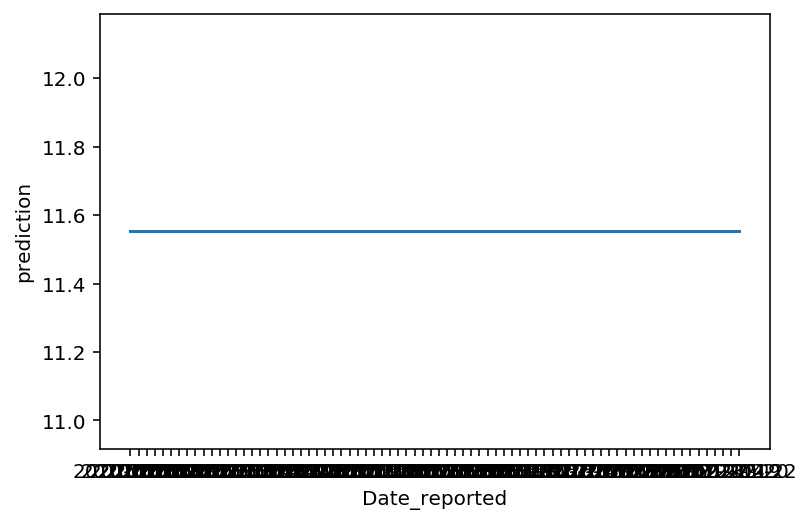

In [0]:
# Plotting the predictions with respect to Date_reported

plt.plot(predictions_to_reveal['Date_reported'] ,predictions_to_reveal['prediction'])
plt.ylabel('prediction')
plt.xlabel('Date_reported')
plt.show()